In [1]:
import tensorflow as tf
from keras import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input,Bidirectional,Dense,Conv1D,Conv3D,LSTM,ConvLSTM1D,ConvLSTM2D,Flatten,Concatenate,TimeDistributed
from keras.layers import Dropout, BatchNormalization, GlobalAveragePooling1D, GlobalAveragePooling3D
from keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from utilz import *
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import keras.losses
import matplotlib.pyplot as plt
import seaborn as sns

2025-12-26 17:11:49.051158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 17:11:51.198053: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-26 17:11:52.745247: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-26 17:12:01.477503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
#visual_of=load_features('./data/2/visual_OFfts.pkl')
visual_ori=load_features('./data2025/fold0_visual_mpor.pkl')
label=load_features('./data2025/fold0_labels.pkl')
#visual_of=load_features('./data2025/fold1_visual_OFfts.pkl')
#visual_clip=load_features('./data2025/fold0_visual_clip.pkl')
#visual_face=load_features('./data2025/fold2_visual_face.pkl')

In [7]:
visual_of=load_features('./data2025/fold2_visual_OFfts.pkl')
visual_clip=load_features('./data2025/fold2_visual_clip.pkl')

In [8]:
print("Shape of visual_face['train'] before saving:", np.shape(visual_face['train']))
print(
    np.shape(visual_ori['train']),
    np.shape(visual_face['train']),
    np.shape(visual_of['train']),
    np.shape(visual_clip['train'])
)

Shape of visual_face['train'] before saving: (343, 16, 224, 224, 3)
(343, 16, 224, 224, 3) (343, 16, 224, 224, 3) (343, 30, 709) (343, 16, 512)


In [4]:
# ========== 计算类别权重 (处理类别不平衡) ==========
# 统计各类别样本数
unique, counts = np.unique(label['train'], return_counts=True)
print("训练集类别分布:")
class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']
for i, (cls, cnt) in enumerate(zip(unique, counts)):
    print(f"  {class_labels[int(cls)]}: {cnt} 样本 ({cnt/len(label['train'])*100:.1f}%)")

# 计算类别权重
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(label['train']),
    y=label['train']
)
class_weight_dict = dict(enumerate(class_weights))
print("\n类别权重:")
for cls, weight in class_weight_dict.items():
    print(f"  {class_labels[cls]}: {weight:.4f}")

训练集类别分布:
  Bored: 99 样本 (27.9%)
  Happy: 55 样本 (15.5%)
  Interested: 70 样本 (19.7%)
  Tired: 75 样本 (21.1%)
  Confused: 56 样本 (15.8%)

类别权重:
  Bored: 0.7172
  Happy: 1.2909
  Interested: 1.0143
  Tired: 0.9467
  Confused: 1.2679


In [30]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda'

# model 1 (CNN+mpori)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv3d_28 (Conv3D)          (None, 8, 112, 112, 32)   2624      
                                                                 
 batch_normalization_28 (Bat  (None, 8, 112, 112, 32)  128       
 chNormalization)                                                
                                                                 
 re_lu_28 (ReLU)             (None, 8, 112, 112, 32)   0         
                                                                 
 conv3d_29 (Conv3D)          (None, 4, 56, 56, 64)     55360     
                                                                 
 batch_normalization_29 (Bat  (None, 4, 56, 56, 64)    256 

Train shape: (343, 16, 224, 224, 3)
Test shape: (179, 16, 224, 224, 3)
Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 3.0182 - acc: 0.1720

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


22/22 [==============================] - 6s 282ms/step - loss: 3.0182 - acc: 0.1720 - val_loss: 2.5431 - val_acc: 0.1732 - lr: 1.0000e-04
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 2.6335 - acc: 0.2770

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


22/22 [==============================] - 6s 261ms/step - loss: 2.6335 - acc: 0.2770 - val_loss: 2.5358 - val_acc: 0.2179 - lr: 1.0000e-04
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 2.4816 - acc: 0.2886

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


22/22 [==============================] - 6s 278ms/step - loss: 2.4816 - acc: 0.2886 - val_loss: 2.4648 - val_acc: 0.2402 - lr: 1.0000e-04
Epoch 4/50
22/22 [==============================] - 4s 178ms/step - loss: 2.4458 - acc: 0.2945 - val_loss: 2.4792 - val_acc: 0.2235 - lr: 1.0000e-04
Epoch 5/50
22/22 [==============================] - 4s 177ms/step - loss: 2.3605 - acc: 0.3615 - val_loss: 2.4858 - val_acc: 0.2346 - lr: 1.0000e-04
Epoch 6/50
22/22 [==============================] - 4s 177ms/step - loss: 2.3406 - acc: 0.3878 - val_loss: 2.4851 - val_acc: 0.2235 - lr: 1.0000e-04
Epoch 7/50
22/22 [==============================] - 4s 177ms/step - loss: 2.3377 - acc: 0.3236 - val_loss: 2.4528 - val_acc: 0.2235 - lr: 1.0000e-04
Epoch 8/50
22/22 [==============================] - ETA: 0s - loss: 2.2310 - acc: 0.3936
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 4s 177ms/step - loss: 2.2310 - acc: 0.3936 - val_loss: 2.444

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


22/22 [==============================] - 7s 305ms/step - loss: 1.9639 - acc: 0.5627 - val_loss: 2.4438 - val_acc: 0.2458 - lr: 5.0000e-05
Epoch 14/50
22/22 [==============================] - ETA: 0s - loss: 1.8828 - acc: 0.6414

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN_Media1.tf/assets


22/22 [==============================] - 6s 276ms/step - loss: 1.8828 - acc: 0.6414 - val_loss: 2.4483 - val_acc: 0.2737 - lr: 5.0000e-05
Epoch 15/50
22/22 [==============================] - 4s 177ms/step - loss: 1.7744 - acc: 0.6501 - val_loss: 2.4693 - val_acc: 0.2346 - lr: 5.0000e-05
Epoch 16/50
22/22 [==============================] - 4s 177ms/step - loss: 1.8165 - acc: 0.6297 - val_loss: 2.4674 - val_acc: 0.2067 - lr: 5.0000e-05
Epoch 17/50
22/22 [==============================] - 4s 177ms/step - loss: 1.7370 - acc: 0.6764 - val_loss: 2.4971 - val_acc: 0.1955 - lr: 5.0000e-05
Epoch 18/50
22/22 [==============================] - 4s 177ms/step - loss: 1.7034 - acc: 0.6997 - val_loss: 2.4798 - val_acc: 0.2123 - lr: 5.0000e-05
Epoch 19/50
22/22 [==============================] - ETA: 0s - loss: 1.6285 - acc: 0.7143
Epoch 19: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
22/22 [==============================] - 4s 177ms/step - loss: 1.6285 - acc: 0.7143 - val_loss:

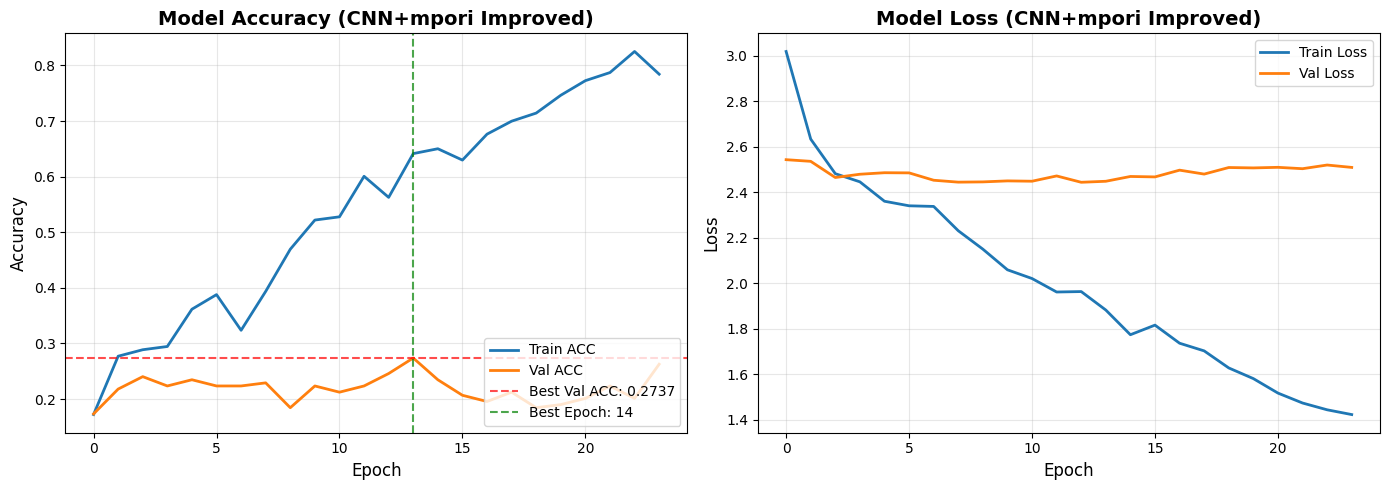


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 22ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.3250    0.5200    0.4000        50
       Happy     0.2121    0.2593    0.2333        27
  Interested     0.2778    0.1351    0.1818        37
       Tired     0.0833    0.0263    0.0400        38
    Confused     0.2778    0.3704    0.3175        27

    accuracy                         0.2737       179
   macro avg     0.2352    0.2622    0.2345       179
weighted avg     0.2398    0.2737    0.2409       179


混淆矩阵:
[[26  8  4  6  6]
 [ 9  7  3  3  5]
 [17  8  5  1  6]
 [17  9  2  1  9]
 [11  1  4  1 10]]


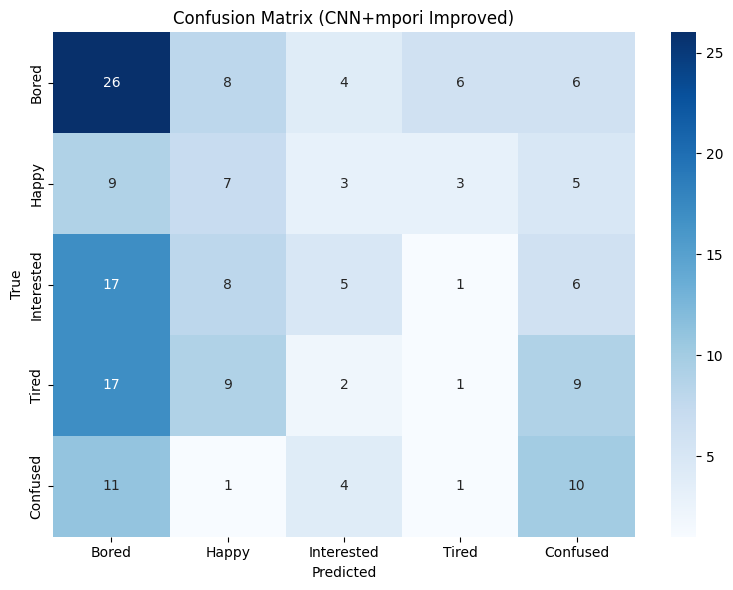


完成！


In [16]:
# ========== 构建改进模型 (CNN+mpori) ==========
# 改进: 增加模型容量、添加BatchNormalization、Dropout、L2正则化、类别权重

x = Input((16, 224, 224, 3))

# 增加滤波器数量，添加BN和L2正则化
h = Conv3D(32, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(64, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(128, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(64, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Flatten()(h)
h = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)  # 添加Dropout防止过拟合
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

# 使用较低的学习率
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres2/1V_model_CNN_Media1.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc',
                  patience=10,  # 增加耐心值
                  restore_best_weights=True,
                  mode='max'),
    ReduceLROnPlateau(monitor='val_acc',  # 动态调整学习率
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

print("Train shape:", np.asarray(visual_ori['train']).shape)
print("Test shape:", np.asarray(visual_ori['test']).shape)

history = model.fit(x=np.asarray(visual_ori['train']),
                    y=np.asarray(label['train']),
                    batch_size=16,
                    epochs=50,  # 增加epochs
                    validation_data=[np.asarray(visual_ori['test']),
                                    np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)  # 使用类别权重

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN+mpori 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN+mpori Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN+mpori Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres2/1CNN_mpori_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres2/1V_model_CNN_Media1.tf')
pred = model.predict(np.asarray(visual_ori['test']))
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables,
                                 predicted_test_lables,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0,
                                 output_dict=False)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(),
                      y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN+mpori Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres2/1CNN_mpori_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# model 1 (CNN+face)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv3d_32 (Conv3D)          (None, 8, 112, 112, 32)   2624      
                                                                 
 batch_normalization_32 (Bat  (None, 8, 112, 112, 32)  128       
 chNormalization)                                                
                                                                 
 re_lu_32 (ReLU)             (None, 8, 112, 112, 32)   0         
                                                                 
 conv3d_33 (Conv3D)          (None, 4, 56, 56, 64)     55360     
                                                                 
 batch_normalization_33 (Bat  (None, 4, 56, 56, 64)    256 

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 288ms/step - loss: 2.9647 - acc: 0.2449 - val_loss: 2.6170 - val_acc: 0.1508 - lr: 1.0000e-04
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 2.6857 - acc: 0.2128

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 267ms/step - loss: 2.6857 - acc: 0.2128 - val_loss: 2.4821 - val_acc: 0.2346 - lr: 1.0000e-04
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 2.4275 - acc: 0.3149

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 275ms/step - loss: 2.4275 - acc: 0.3149 - val_loss: 2.4514 - val_acc: 0.2849 - lr: 1.0000e-04
Epoch 4/50
22/22 [==============================] - 4s 176ms/step - loss: 2.4006 - acc: 0.3615 - val_loss: 2.4607 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 5/50
22/22 [==============================] - 4s 175ms/step - loss: 2.2803 - acc: 0.3703 - val_loss: 2.4881 - val_acc: 0.2291 - lr: 1.0000e-04
Epoch 6/50
22/22 [==============================] - 4s 176ms/step - loss: 2.2314 - acc: 0.4082 - val_loss: 2.4302 - val_acc: 0.2346 - lr: 1.0000e-04
Epoch 7/50
22/22 [==============================] - ETA: 0s - loss: 2.1604 - acc: 0.4315

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 296ms/step - loss: 2.1604 - acc: 0.4315 - val_loss: 2.4063 - val_acc: 0.2905 - lr: 1.0000e-04
Epoch 8/50
22/22 [==============================] - 4s 177ms/step - loss: 2.0093 - acc: 0.4985 - val_loss: 2.4394 - val_acc: 0.2402 - lr: 1.0000e-04
Epoch 9/50
22/22 [==============================] - 4s 177ms/step - loss: 1.9779 - acc: 0.5306 - val_loss: 2.4238 - val_acc: 0.2793 - lr: 1.0000e-04
Epoch 10/50
22/22 [==============================] - 4s 177ms/step - loss: 1.9823 - acc: 0.5423 - val_loss: 2.4466 - val_acc: 0.2514 - lr: 1.0000e-04
Epoch 11/50
22/22 [==============================] - 4s 176ms/step - loss: 1.7775 - acc: 0.6356 - val_loss: 2.4882 - val_acc: 0.2514 - lr: 1.0000e-04
Epoch 12/50
22/22 [==============================] - ETA: 0s - loss: 1.7989 - acc: 0.6064
Epoch 12: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 4s 177ms/step - loss: 1.7989 - acc: 0.6064 - val_loss: 2

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 7s 309ms/step - loss: 1.4948 - acc: 0.7755 - val_loss: 2.4713 - val_acc: 0.3240 - lr: 5.0000e-05
Epoch 16/50
22/22 [==============================] - 4s 176ms/step - loss: 1.3765 - acc: 0.8338 - val_loss: 2.4800 - val_acc: 0.2849 - lr: 5.0000e-05
Epoch 17/50
22/22 [==============================] - 4s 176ms/step - loss: 1.3574 - acc: 0.8017 - val_loss: 2.5038 - val_acc: 0.2905 - lr: 5.0000e-05
Epoch 18/50
22/22 [==============================] - 4s 178ms/step - loss: 1.3094 - acc: 0.8484 - val_loss: 2.5569 - val_acc: 0.2514 - lr: 5.0000e-05
Epoch 19/50
22/22 [==============================] - 4s 177ms/step - loss: 1.2581 - acc: 0.8601 - val_loss: 2.5909 - val_acc: 0.2626 - lr: 5.0000e-05
Epoch 20/50
22/22 [==============================] - ETA: 0s - loss: 1.2068 - acc: 0.8688
Epoch 20: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
22/22 [==============================] - 4s 178ms/step - loss: 1.2068 - acc: 0.8688 - val_loss:

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 281ms/step - loss: 1.1227 - acc: 0.9155 - val_loss: 2.6241 - val_acc: 0.3296 - lr: 2.5000e-05
Epoch 25/50
22/22 [==============================] - 4s 176ms/step - loss: 1.1141 - acc: 0.9125 - val_loss: 2.6491 - val_acc: 0.3017 - lr: 2.5000e-05
Epoch 26/50
22/22 [==============================] - 4s 177ms/step - loss: 1.0958 - acc: 0.9096 - val_loss: 2.6233 - val_acc: 0.3128 - lr: 2.5000e-05
Epoch 27/50
22/22 [==============================] - 4s 177ms/step - loss: 1.0803 - acc: 0.9242 - val_loss: 2.6521 - val_acc: 0.3240 - lr: 2.5000e-05
Epoch 28/50
22/22 [==============================] - ETA: 0s - loss: 1.0659 - acc: 0.9359

INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/V_model_CNN_face.tf/assets


22/22 [==============================] - 6s 255ms/step - loss: 1.0659 - acc: 0.9359 - val_loss: 2.6480 - val_acc: 0.3352 - lr: 2.5000e-05
Epoch 29/50
22/22 [==============================] - 4s 177ms/step - loss: 1.0709 - acc: 0.9359 - val_loss: 2.6977 - val_acc: 0.3128 - lr: 2.5000e-05
Epoch 30/50
22/22 [==============================] - 4s 177ms/step - loss: 1.0684 - acc: 0.9271 - val_loss: 2.6835 - val_acc: 0.3296 - lr: 2.5000e-05
Epoch 31/50
22/22 [==============================] - 4s 177ms/step - loss: 1.0350 - acc: 0.9417 - val_loss: 2.6838 - val_acc: 0.3073 - lr: 2.5000e-05
Epoch 32/50
22/22 [==============================] - 4s 176ms/step - loss: 1.0623 - acc: 0.9329 - val_loss: 2.7141 - val_acc: 0.2961 - lr: 2.5000e-05
Epoch 33/50
22/22 [==============================] - ETA: 0s - loss: 1.0488 - acc: 0.9271
Epoch 33: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
22/22 [==============================] - 4s 176ms/step - loss: 1.0488 - acc: 0.9271 - val_loss:

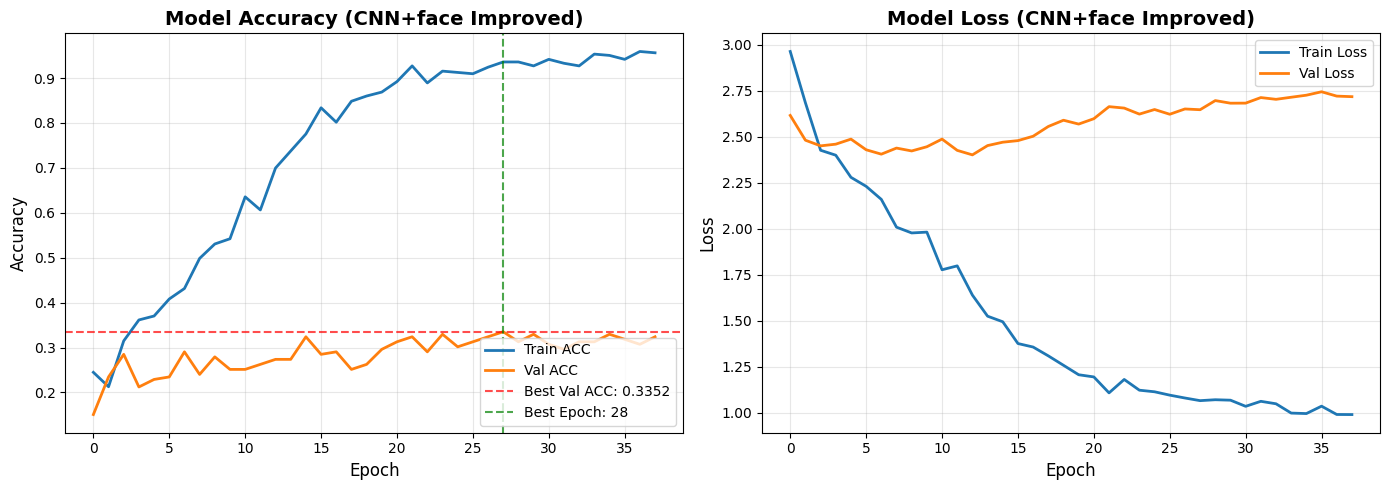


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 22ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.3934    0.4800    0.4324        50
       Happy     0.4286    0.4444    0.4364        27
  Interested     0.3125    0.2703    0.2899        37
       Tired     0.2750    0.2895    0.2821        38
    Confused     0.1667    0.1111    0.1333        27

    accuracy                         0.3352       179
   macro avg     0.3152    0.3191    0.3148       179
weighted avg     0.3227    0.3352    0.3265       179


混淆矩阵:
[[24  3  7 11  5]
 [ 7 12  4  3  1]
 [11  4 10  8  4]
 [12  5  5 11  5]
 [ 7  4  6  7  3]]


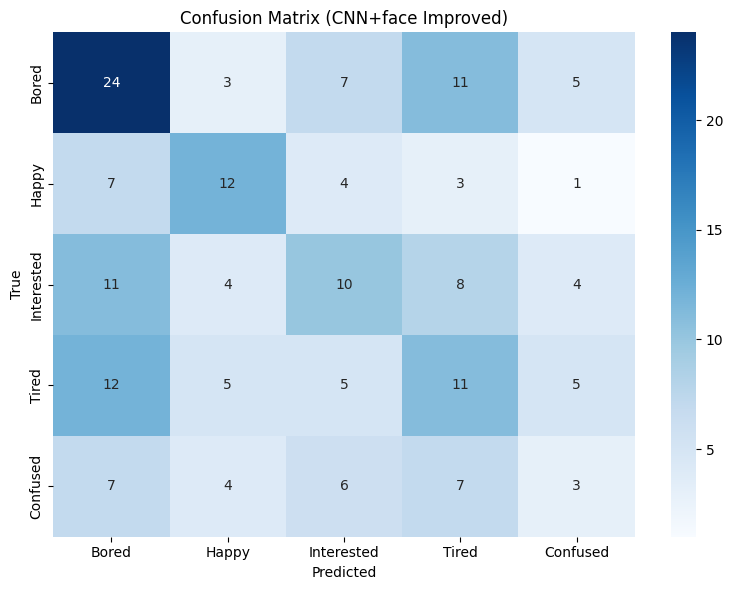


完成！


In [17]:
# ========== 构建改进模型 (CNN+face) ==========
# 改进: 增加模型容量、添加BatchNormalization、Dropout、L2正则化、类别权重

x = Input((16, 224, 224, 3))

h = Conv3D(32, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(64, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(128, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(64, [3,3,3], [2,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Flatten()(h)
h = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres2/V_model_CNN_face.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc',
                  patience=10,
                  restore_best_weights=True,
                  mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

print("Train shape:", np.asarray(visual_face['train']).shape)
print("Test shape:", np.asarray(visual_face['test']).shape)

history = model.fit(x=np.asarray(visual_face['train']),
                    y=np.asarray(label['train']),
                    batch_size=16,
                    epochs=50,
                    validation_data=[np.asarray(visual_face['test']),
                                    np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN+face 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN+face Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN+face Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres2/CNN_face_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres2/V_model_CNN_face.tf')
pred = model.predict(np.asarray(visual_face['test']))
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables,
                                 predicted_test_lables,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0,
                                 output_dict=False)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(),
                      y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN+face Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres2/CNN_face_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# (model 2) ConvLSTM2D+mpori

In [ ]:
# ========== 构建改进模型 (ConvLSTM2D+mpori) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_ori['train'])
test_data = np.asarray(visual_ori['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = ConvLSTM2D(32, [3,3], [2,2], 'same', return_sequences=True, 
               kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)

h = ConvLSTM2D(64, [3,3], [2,2], 'same', return_sequences=True,
               kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)

h = TimeDistributed(Flatten())(h)
h = LSTM(128, return_sequences=False, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres1/V_model_ConvLSTM2D_mpori.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc',
                  patience=10,
                  restore_best_weights=True,
                  mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=4,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (ConvLSTM2D+mpori 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (ConvLSTM2D+mpori Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (ConvLSTM2D+mpori Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres1/ConvLSTM2D_mpori_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres1/V_model_ConvLSTM2D_mpori.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables,
                                 predicted_test_lables,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0,
                                 output_dict=False)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(),
                      y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ConvLSTM2D+mpori Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres1/ConvLSTM2D_mpori_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")


Train shape: (346, 16, 224, 224, 3)
Test shape: (176, 16, 224, 224, 3)


2025-12-24 14:46:49.761593: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 392.00MiB (rounded to 411041792)requested by op StatelessRandomUniformV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-12-24 14:46:49.761702: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2025-12-24 14:46:49.761726: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 75, Chunks in use: 75. 18.8KiB allocated for chunks. 18.8KiB in use in bin. 8.2KiB client-requested in use in bin.
2025-12-24 14:46:49.761744: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 6, Chunks in use: 6. 3.0KiB allocated for chunks. 3.0KiB in use in bin. 3.0KiB client-requested in use in bin.
2025-12-24 14:46:

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[200704,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

# (model 2) ConvLSTM2D+face

Train shape: (343, 16, 224, 224, 3)
Test shape: (179, 16, 224, 224, 3)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 16, 112, 112, 32)  40448     
                                                                 
 batch_normalization_8 (Batc  (None, 16, 112, 112, 32)  128      
 hNormalization)                                                 
                                                                 
 conv_lstm2d_3 (ConvLSTM2D)  (None, 16, 56, 56, 64)    221440    
                                                                 
 batch_normalization_9 (Batc  (None, 16, 56, 56, 64)   256       
 hNormalization)                                      

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


86/86 [==============================] - 65s 752ms/step - loss: 3.1636 - acc: 0.1691 - val_loss: 2.8979 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 2/50
86/86 [==============================] - 23s 271ms/step - loss: 3.0158 - acc: 0.1837 - val_loss: 2.8493 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 3/50
86/86 [==============================] - ETA: 0s - loss: 2.9026 - acc: 0.2420

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


86/86 [==============================] - 51s 602ms/step - loss: 2.9026 - acc: 0.2420 - val_loss: 2.8208 - val_acc: 0.2570 - lr: 1.0000e-04
Epoch 4/50
86/86 [==============================] - ETA: 0s - loss: 2.8729 - acc: 0.2070

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_ConvLSTM2D_face.tf/assets


86/86 [==============================] - 45s 527ms/step - loss: 2.8729 - acc: 0.2070 - val_loss: 2.7624 - val_acc: 0.2905 - lr: 1.0000e-04
Epoch 5/50
86/86 [==============================] - 22s 259ms/step - loss: 2.8174 - acc: 0.2245 - val_loss: 2.7255 - val_acc: 0.2291 - lr: 1.0000e-04
Epoch 6/50
86/86 [==============================] - 23s 268ms/step - loss: 2.7784 - acc: 0.1866 - val_loss: 2.6855 - val_acc: 0.1620 - lr: 1.0000e-04
Epoch 7/50
86/86 [==============================] - 22s 260ms/step - loss: 2.7450 - acc: 0.1924 - val_loss: 2.6559 - val_acc: 0.1620 - lr: 1.0000e-04
Epoch 8/50
86/86 [==============================] - 22s 259ms/step - loss: 2.6438 - acc: 0.2099 - val_loss: 2.5903 - val_acc: 0.2011 - lr: 1.0000e-04
Epoch 9/50
86/86 [==============================] - 23s 265ms/step - loss: 2.6162 - acc: 0.2157 - val_loss: 2.5706 - val_acc: 0.2067 - lr: 1.0000e-04
Epoch 10/50
86/86 [==============================] - 22s 260ms/step - loss: 2.5736 - acc: 0.2274 - val_loss: 2.

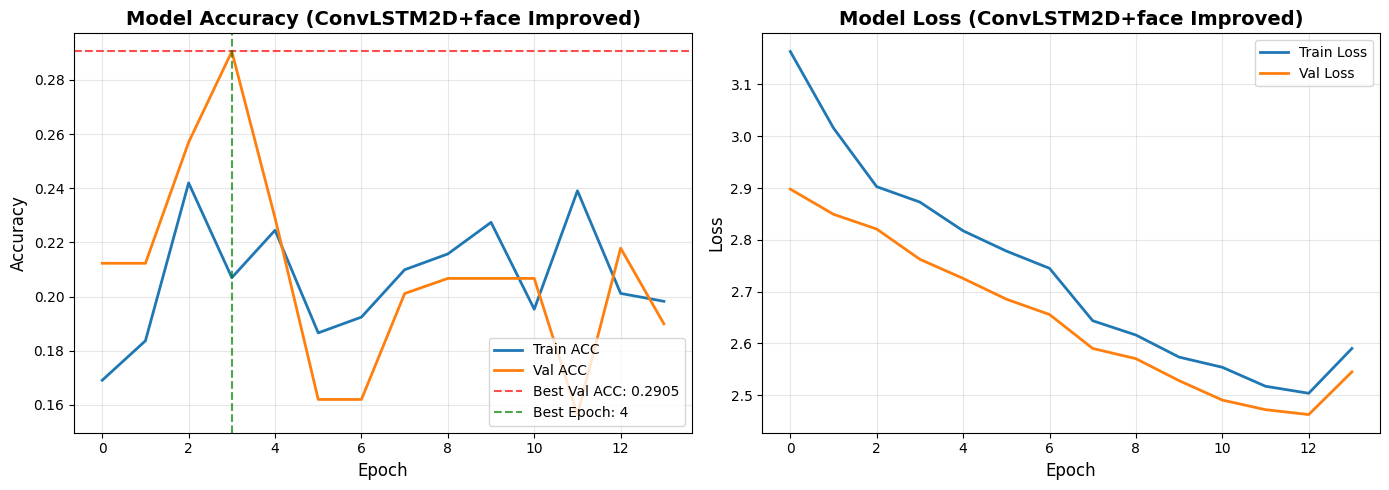


正在加载最佳模型进行测试...
6/6 [==============================] - 2s 198ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.2971    0.8200    0.4362        50
       Happy     0.2564    0.3704    0.3030        27
  Interested     0.0000    0.0000    0.0000        37
       Tired     0.0000    0.0000    0.0000        38
    Confused     0.5000    0.0370    0.0690        27

    accuracy                         0.2905       179
   macro avg     0.2107    0.2455    0.1616       179
weighted avg     0.1971    0.2905    0.1779       179


混淆矩阵:
[[41  9  0  0  0]
 [17 10  0  0  0]
 [31  6  0  0  0]
 [30  7  0  0  1]
 [19  7  0  0  1]]


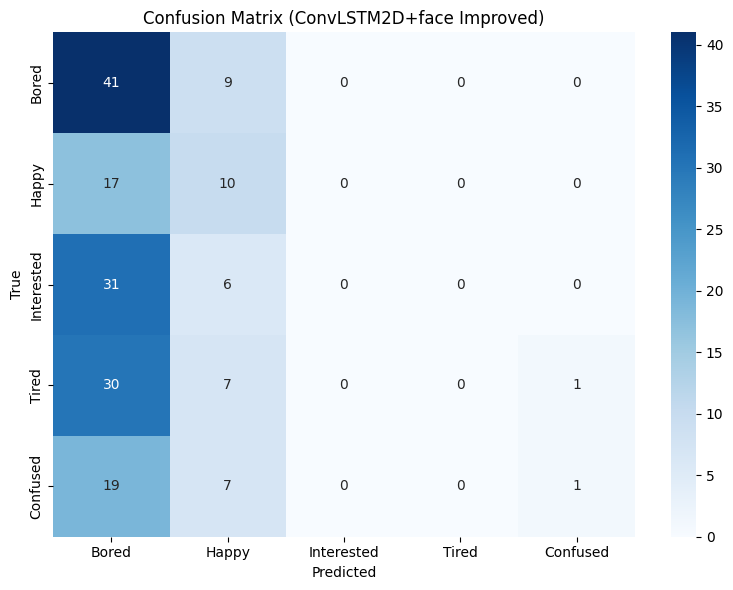


完成！


In [13]:
# ========== 构建改进模型 (ConvLSTM2D+face) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_face['train'])
test_data = np.asarray(visual_face['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = ConvLSTM2D(32, [3,3], [2,2], 'same', return_sequences=True,
               kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)

h = ConvLSTM2D(64, [3,3], [2,2], 'same', return_sequences=True,
               kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)

h = TimeDistributed(Flatten())(h)
h = LSTM(128, return_sequences=False, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres2/1V_model_ConvLSTM2D_face.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc',
                  patience=10,
                  restore_best_weights=True,
                  mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=10,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=4,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (ConvLSTM2D+face 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (ConvLSTM2D+face Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (ConvLSTM2D+face Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres2/ConvLSTM2D_face_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres2/1V_model_ConvLSTM2D_face.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables,
                                 predicted_test_lables,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0,
                                 output_dict=False)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(),
                      y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ConvLSTM2D+face Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres2/ConvLSTM2D_face_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")


# (model 1)CNN1D+openface

Train shape: (343, 30, 709)
Test shape: (179, 30, 709)
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 30, 709)]         0         
                                                                 
 conv1d_21 (Conv1D)          (None, 30, 256)           544768    
                                                                 
 batch_normalization_25 (Bat  (None, 30, 256)          1024      
 chNormalization)                                                
                                                                 
 re_lu_21 (ReLU)             (None, 30, 256)           0         
                                                                 
 dropout_27 (Dropout)        (None, 30, 256)           0         
                                                                 
 conv1d_22 (Conv1D)          (None, 30, 256)           65792     
    

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


22/22 [==============================] - 2s 86ms/step - loss: 2.7673 - acc: 0.1983 - val_loss: 3.2687 - val_acc: 0.2067 - lr: 1.0000e-04
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 2.7177 - acc: 0.2157

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


22/22 [==============================] - 2s 100ms/step - loss: 2.7177 - acc: 0.2157 - val_loss: 2.6686 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 3/50
22/22 [==============================] - 1s 25ms/step - loss: 2.6832 - acc: 0.2245 - val_loss: 2.6417 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 4/50
22/22 [==============================] - 1s 25ms/step - loss: 2.6477 - acc: 0.2332 - val_loss: 2.6217 - val_acc: 0.2011 - lr: 1.0000e-04
Epoch 5/50
22/22 [==============================] - 1s 25ms/step - loss: 2.6387 - acc: 0.2391 - val_loss: 2.6521 - val_acc: 0.1788 - lr: 1.0000e-04
Epoch 6/50
22/22 [==============================] - 1s 26ms/step - loss: 2.6587 - acc: 0.2274 - val_loss: 2.6272 - val_acc: 0.1676 - lr: 1.0000e-04
Epoch 7/50
22/22 [==============================] - ETA: 0s - loss: 2.6154 - acc: 0.2274

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


22/22 [==============================] - 1s 68ms/step - loss: 2.6154 - acc: 0.2274 - val_loss: 2.6236 - val_acc: 0.2179 - lr: 1.0000e-04
Epoch 8/50
22/22 [==============================] - ETA: 0s - loss: 2.6157 - acc: 0.2566

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


22/22 [==============================] - 2s 73ms/step - loss: 2.6157 - acc: 0.2566 - val_loss: 2.6081 - val_acc: 0.2570 - lr: 1.0000e-04
Epoch 9/50
22/22 [==============================] - 1s 25ms/step - loss: 2.5822 - acc: 0.2682 - val_loss: 2.6157 - val_acc: 0.2291 - lr: 1.0000e-04
Epoch 10/50
22/22 [==============================] - ETA: 0s - loss: 2.5910 - acc: 0.2332

INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres2/1V_model_CNN1D_openface.tf/assets


22/22 [==============================] - 2s 81ms/step - loss: 2.5910 - acc: 0.2332 - val_loss: 2.5950 - val_acc: 0.2626 - lr: 1.0000e-04
Epoch 11/50
22/22 [==============================] - 1s 26ms/step - loss: 2.5530 - acc: 0.2711 - val_loss: 2.5621 - val_acc: 0.2626 - lr: 1.0000e-04
Epoch 12/50
22/22 [==============================] - 1s 26ms/step - loss: 2.5923 - acc: 0.2682 - val_loss: 2.5686 - val_acc: 0.2626 - lr: 1.0000e-04
Epoch 13/50
22/22 [==============================] - 1s 26ms/step - loss: 2.5733 - acc: 0.2391 - val_loss: 2.5972 - val_acc: 0.2291 - lr: 1.0000e-04
Epoch 14/50
22/22 [==============================] - 1s 26ms/step - loss: 2.5651 - acc: 0.2507 - val_loss: 2.6145 - val_acc: 0.2179 - lr: 1.0000e-04
Epoch 15/50
22/22 [==============================] - ETA: 0s - loss: 2.5204 - acc: 0.2974
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 1s 27ms/step - loss: 2.5204 - acc: 0.2974 - val_loss: 2.583

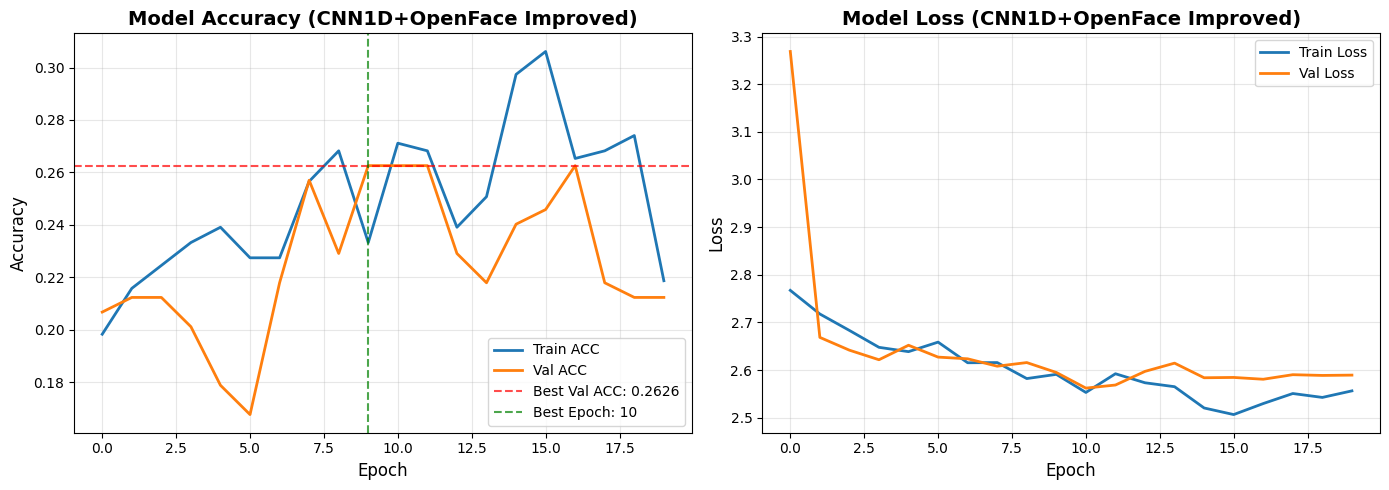


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 2ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.4444    0.1600    0.2353        50
       Happy     0.2500    0.1481    0.1860        27
  Interested     0.0000    0.0000    0.0000        37
       Tired     0.2448    0.9211    0.3867        38
    Confused     0.0000    0.0000    0.0000        27

    accuracy                         0.2626       179
   macro avg     0.1878    0.2458    0.1616       179
weighted avg     0.2138    0.2626    0.1759       179


混淆矩阵:
[[ 8  7  0 35  0]
 [ 0  4  0 23  0]
 [ 4  3  0 28  2]
 [ 2  1  0 35  0]
 [ 4  1  0 22  0]]


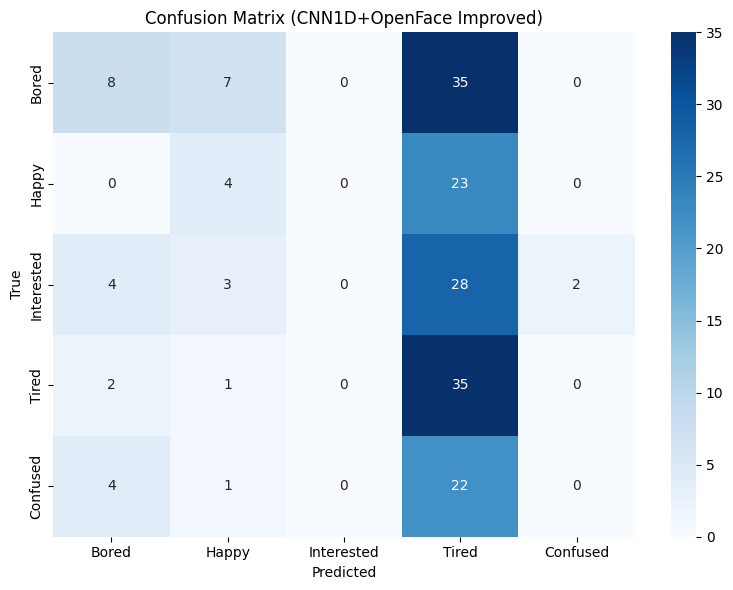


完成！


In [19]:
# ========== 构建改进模型 (CNN1D+OpenFace) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_of['train'])
test_data = np.asarray(visual_of['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(256, 3, 1, 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)
h = Dropout(0.2)(h)

h = Conv1D(256, 1, 1, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv1D(128, 3, 1, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = tf.keras.layers.GlobalAveragePooling1D()(h)  # 使用GlobalAveragePooling替代Flatten
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres2/1V_model_CNN1D_openface.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=16,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN1D+OpenFace 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN1D+OpenFace Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN1D+OpenFace Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres2/CNN1D_openface_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres2/1V_model_CNN1D_openface.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables, predicted_test_lables,
                                 target_names=class_labels, digits=4, zero_division=0)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(), y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN1D+OpenFace Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres2/CNN1D_openface_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# (model 2)CNN1D+clip

Train shape: (343, 16, 512)
Test shape: (179, 16, 512)
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 16, 512)]         0         
                                                                 
 conv1d_75 (Conv1D)          (None, 16, 64)            98368     
                                                                 
 conv1d_76 (Conv1D)          (None, 16, 64)            4160      
                                                                 
 conv1d_77 (Conv1D)          (None, 16, 64)            12352     
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_69 (Dense)            (None, 5)                 5125      
                                                                 
Tot

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 28ms/step - loss: 1.7601 - acc: 0.1254 - val_loss: 1.6513 - val_acc: 0.2235 - lr: 1.0000e-04
Epoch 2/50
18/22 [=======================>......] - ETA: 0s - loss: 1.6091 - acc: 0.2569

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 27ms/step - loss: 1.6058 - acc: 0.2682 - val_loss: 1.6205 - val_acc: 0.2905 - lr: 1.0000e-04
Epoch 3/50
20/22 [==========================>...] - ETA: 0s - loss: 1.5176 - acc: 0.3438

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 28ms/step - loss: 1.5124 - acc: 0.3469 - val_loss: 1.5499 - val_acc: 0.2961 - lr: 1.0000e-04
Epoch 4/50
19/22 [========================>.....] - ETA: 0s - loss: 1.4447 - acc: 0.4013

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 35ms/step - loss: 1.4419 - acc: 0.4023 - val_loss: 1.5340 - val_acc: 0.3128 - lr: 1.0000e-04
Epoch 5/50
17/22 [======================>.......] - ETA: 0s - loss: 1.3799 - acc: 0.4632

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 55ms/step - loss: 1.3695 - acc: 0.4548 - val_loss: 1.4755 - val_acc: 0.3687 - lr: 1.0000e-04
Epoch 6/50
19/22 [========================>.....] - ETA: 0s - loss: 1.3065 - acc: 0.5000

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 1s 28ms/step - loss: 1.3023 - acc: 0.5073 - val_loss: 1.4630 - val_acc: 0.3799 - lr: 1.0000e-04
Epoch 7/50
22/22 [==============================] - 0s 13ms/step - loss: 1.2341 - acc: 0.5248 - val_loss: 1.4415 - val_acc: 0.3184 - lr: 1.0000e-04
Epoch 8/50
22/22 [==============================] - 0s 14ms/step - loss: 1.1854 - acc: 0.5364 - val_loss: 1.4244 - val_acc: 0.3743 - lr: 1.0000e-04
Epoch 9/50
22/22 [==============================] - 0s 12ms/step - loss: 1.1425 - acc: 0.5598 - val_loss: 1.4644 - val_acc: 0.3464 - lr: 1.0000e-04
Epoch 10/50
19/22 [========================>.....] - ETA: 0s - loss: 1.0962 - acc: 0.5691

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_clip.tf/assets


22/22 [==============================] - 2s 77ms/step - loss: 1.0986 - acc: 0.5685 - val_loss: 1.4340 - val_acc: 0.3855 - lr: 1.0000e-04
Epoch 11/50
22/22 [==============================] - 0s 14ms/step - loss: 1.0905 - acc: 0.5394 - val_loss: 1.4105 - val_acc: 0.3575 - lr: 1.0000e-04
Epoch 12/50
22/22 [==============================] - 0s 13ms/step - loss: 1.0112 - acc: 0.6531 - val_loss: 1.4508 - val_acc: 0.3687 - lr: 1.0000e-04
Epoch 13/50
22/22 [==============================] - 0s 12ms/step - loss: 0.9892 - acc: 0.6297 - val_loss: 1.4339 - val_acc: 0.3631 - lr: 1.0000e-04
Epoch 14/50
22/22 [==============================] - 0s 14ms/step - loss: 0.9599 - acc: 0.6531 - val_loss: 1.4904 - val_acc: 0.3575 - lr: 1.0000e-04
Epoch 15/50
19/22 [========================>.....] - ETA: 0s - loss: 0.9073 - acc: 0.6546
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 0s 13ms/step - loss: 0.9299 - acc: 0.6443 - val_loss: 1.470

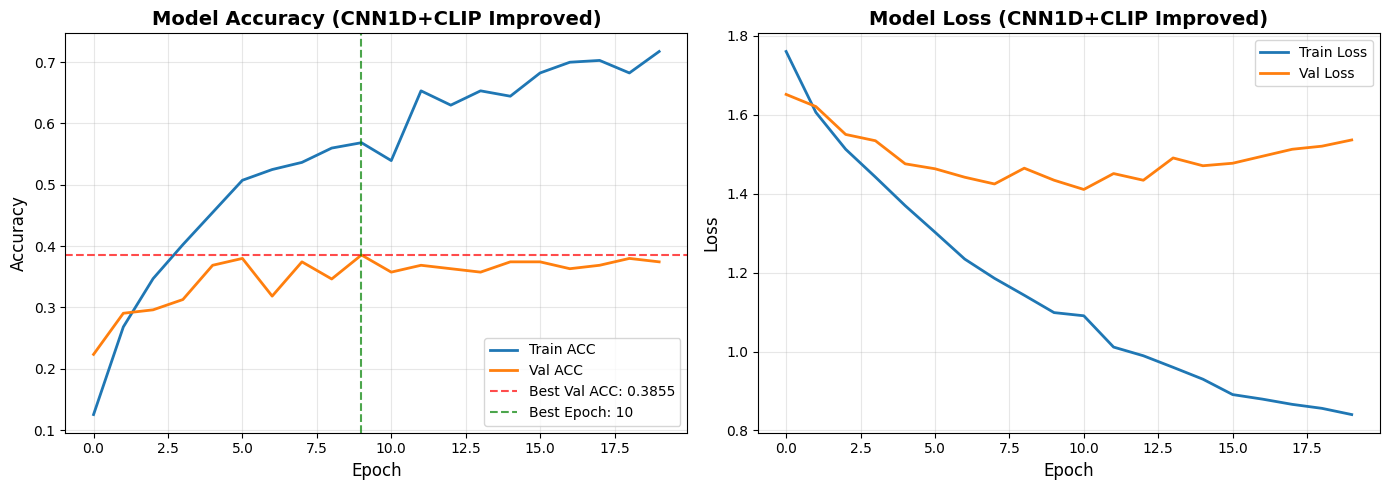


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 2ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.3043    0.1400    0.1918        50
       Happy     0.6000    0.7778    0.6774        27
  Interested     0.2093    0.2432    0.2250        37
       Tired     0.4314    0.5789    0.4944        38
    Confused     0.3704    0.3704    0.3704        27

    accuracy                         0.3855       179
   macro avg     0.3831    0.4221    0.3918       179
weighted avg     0.3662    0.3855    0.3631       179


混淆矩阵:
[[ 7  2 24 10  7]
 [ 4 21  1  1  0]
 [ 4  8  9 11  5]
 [ 6  2  3 22  5]
 [ 2  2  6  7 10]]


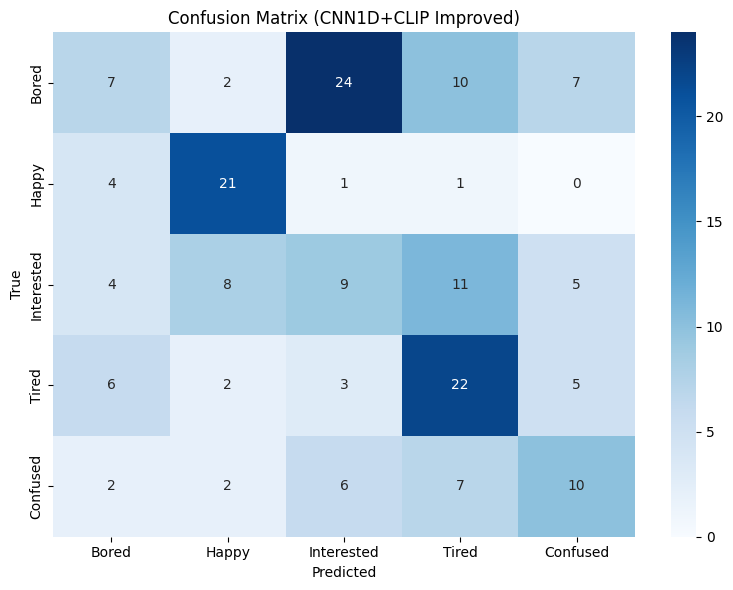


完成！


In [37]:
# ========== 构建改进模型 (CNN1D+CLIP) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_clip['train'])
test_data = np.asarray(visual_clip['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(64, 3, 1, 'same')(x)
h = Conv1D(64, 1, 1, 'same')(h)
h = Conv1D(64, 3, 1, 'same')(h)
h = Flatten()(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres3/1V_model_CNN1D_clip.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=16,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN1D+CLIP 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN1D+CLIP Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN1D+CLIP Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_clip_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres3/1V_model_CNN1D_clip.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables, predicted_test_lables,
                                 target_names=class_labels, digits=4, zero_division=0)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(), y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN1D+CLIP Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_clip_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# (model 3)CNN1D+LSTM+openface

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 30, 709)]         0         
                                                                 
 conv1d_54 (Conv1D)          (None, 30, 128)           272384    
                                                                 
 batch_normalization_58 (Bat  (None, 30, 128)          512       
 chNormalization)                                                
                                                                 
 re_lu_54 (ReLU)             (None, 30, 128)           0         
                                                                 
 dropout_70 (Dropout)        (None, 30, 128)           0         
                                                                 
 conv1d_55 (Conv1D)          (None, 30, 128)           16512     
                                                          

INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


43/43 [==============================] - 4s 89ms/step - loss: 2.3971 - acc: 0.1866 - val_loss: 2.3595 - val_acc: 0.1844 - lr: 1.0000e-04
Epoch 2/50
43/43 [==============================] - 1s 31ms/step - loss: 2.3815 - acc: 0.2157 - val_loss: 2.3694 - val_acc: 0.1732 - lr: 1.0000e-04
Epoch 3/50
42/43 [============================>.] - ETA: 0s - loss: 2.3829 - acc: 0.1905

INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


43/43 [==============================] - 3s 79ms/step - loss: 2.3812 - acc: 0.1895 - val_loss: 2.3380 - val_acc: 0.2123 - lr: 1.0000e-04
Epoch 4/50
43/43 [==============================] - 1s 31ms/step - loss: 2.3616 - acc: 0.2157 - val_loss: 2.3363 - val_acc: 0.1732 - lr: 1.0000e-04
Epoch 5/50
41/43 [===========================>..] - ETA: 0s - loss: 2.3240 - acc: 0.2378

INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/V_model_CNN1D_LSTM_openface.tf/assets


43/43 [==============================] - 4s 88ms/step - loss: 2.3283 - acc: 0.2391 - val_loss: 2.3146 - val_acc: 0.2849 - lr: 1.0000e-04
Epoch 6/50
43/43 [==============================] - 1s 32ms/step - loss: 2.3422 - acc: 0.2303 - val_loss: 2.3187 - val_acc: 0.2458 - lr: 1.0000e-04
Epoch 7/50
43/43 [==============================] - 1s 31ms/step - loss: 2.3308 - acc: 0.2187 - val_loss: 2.3163 - val_acc: 0.2570 - lr: 1.0000e-04
Epoch 8/50
43/43 [==============================] - 1s 31ms/step - loss: 2.3176 - acc: 0.1837 - val_loss: 2.3079 - val_acc: 0.2514 - lr: 1.0000e-04
Epoch 9/50
43/43 [==============================] - 1s 31ms/step - loss: 2.3255 - acc: 0.2128 - val_loss: 2.3093 - val_acc: 0.1788 - lr: 1.0000e-04
Epoch 10/50
43/43 [==============================] - ETA: 0s - loss: 2.3056 - acc: 0.2041
Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
43/43 [==============================] - 1s 32ms/step - loss: 2.3056 - acc: 0.2041 - val_loss: 2.3083 - 

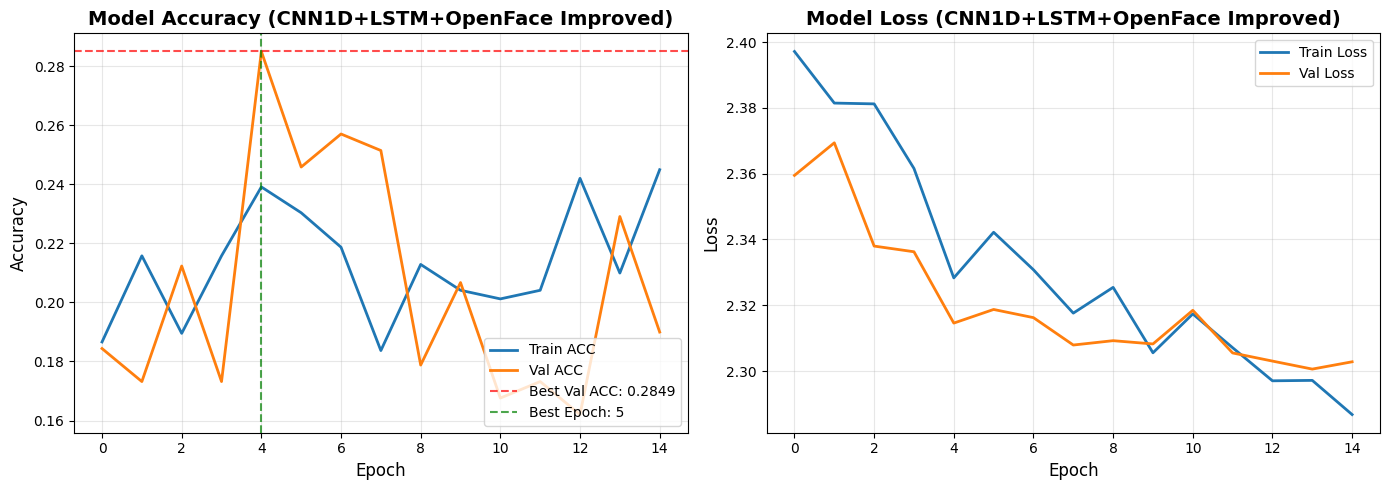


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 3ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.3654    0.3800    0.3725        50
       Happy     0.6667    0.0741    0.1333        27
  Interested     0.0000    0.0000    0.0000        37
       Tired     0.2419    0.7895    0.3704        38
    Confused     0.0000    0.0000    0.0000        27

    accuracy                         0.2849       179
   macro avg     0.2548    0.2487    0.1753       179
weighted avg     0.2540    0.2849    0.2028       179


混淆矩阵:
[[19  1  0 30  0]
 [ 4  2  0 21  0]
 [13  0  0 24  0]
 [ 8  0  0 30  0]
 [ 8  0  0 19  0]]


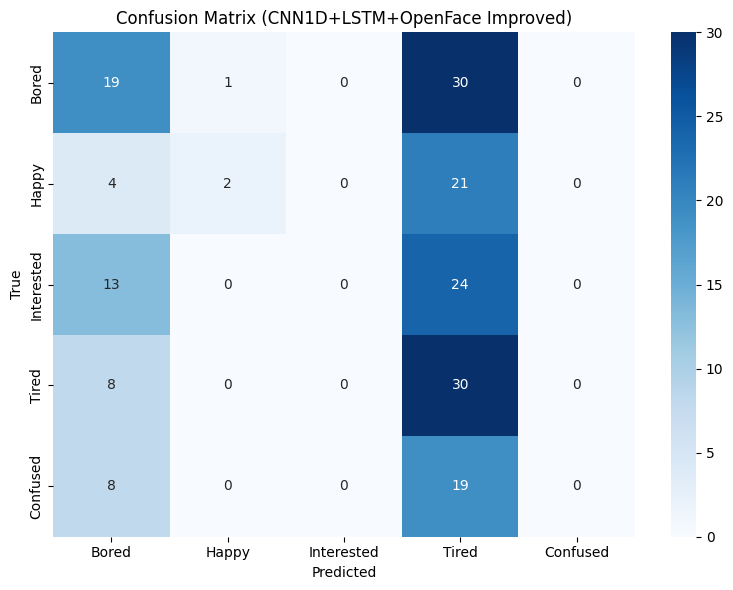


完成！


In [30]:
# ========== 构建改进模型 (CNN1D+LSTM+OpenFace) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重
train_data = np.asarray(visual_of['train'])
test_data = np.asarray(visual_of['test'])


input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(128, 3, 1, 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)
h = Dropout(0.2)(h)

h = Conv1D(128, 1, 1, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv1D(64, 3, 2, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

# LSTM层
h = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)

h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres3/V_model_CNN1D_LSTM_openface.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=8,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN1D+LSTM+OpenFace 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN1D+LSTM+OpenFace Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN1D+LSTM+OpenFace Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_LSTM_openface_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres3/V_model_CNN1D_LSTM_openface.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables, predicted_test_lables,
                                 target_names=class_labels, digits=4, zero_division=0)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(), y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN1D+LSTM+OpenFace Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_LSTM_openface_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# (model 3)CNN1D+LSTM+clip

Train shape: (343, 16, 512)
Test shape: (179, 16, 512)
Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 16, 512)]         0         
                                                                 
 conv1d_96 (Conv1D)          (None, 16, 128)           196736    
                                                                 
 conv1d_97 (Conv1D)          (None, 16, 128)           16512     
                                                                 
 batch_normalization_73 (Bat  (None, 16, 128)          512       
 chNormalization)                                                
                                                                 
 re_lu_69 (ReLU)             (None, 16, 128)           0         
                                                                 
 conv1d_98 (Conv1D)          (None, 8, 64)             24640     
   

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 80ms/step - loss: 2.3584 - acc: 0.2245 - val_loss: 2.3441 - val_acc: 0.2570 - lr: 1.0000e-04
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 2.3391 - acc: 0.1866

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 83ms/step - loss: 2.3391 - acc: 0.1866 - val_loss: 2.3385 - val_acc: 0.2682 - lr: 1.0000e-04
Epoch 3/50
43/43 [==============================] - 1s 27ms/step - loss: 2.3388 - acc: 0.1691 - val_loss: 2.3330 - val_acc: 0.2458 - lr: 1.0000e-04
Epoch 4/50
43/43 [==============================] - ETA: 0s - loss: 2.3188 - acc: 0.2303

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 79ms/step - loss: 2.3188 - acc: 0.2303 - val_loss: 2.3290 - val_acc: 0.2737 - lr: 1.0000e-04
Epoch 5/50
43/43 [==============================] - ETA: 0s - loss: 2.3077 - acc: 0.2566

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 78ms/step - loss: 2.3077 - acc: 0.2566 - val_loss: 2.3201 - val_acc: 0.2905 - lr: 1.0000e-04
Epoch 6/50
43/43 [==============================] - 1s 28ms/step - loss: 2.3032 - acc: 0.2478 - val_loss: 2.3141 - val_acc: 0.2346 - lr: 1.0000e-04
Epoch 7/50
43/43 [==============================] - 1s 27ms/step - loss: 2.2872 - acc: 0.2711 - val_loss: 2.3034 - val_acc: 0.2737 - lr: 1.0000e-04
Epoch 8/50
41/43 [===========================>..] - ETA: 0s - loss: 2.2668 - acc: 0.3079

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 82ms/step - loss: 2.2565 - acc: 0.3090 - val_loss: 2.2936 - val_acc: 0.3352 - lr: 1.0000e-04
Epoch 9/50
43/43 [==============================] - 1s 27ms/step - loss: 2.2355 - acc: 0.3061 - val_loss: 2.2735 - val_acc: 0.2905 - lr: 1.0000e-04
Epoch 10/50
43/43 [==============================] - 1s 28ms/step - loss: 2.2284 - acc: 0.3469 - val_loss: 2.2562 - val_acc: 0.3128 - lr: 1.0000e-04
Epoch 11/50
41/43 [===========================>..] - ETA: 0s - loss: 2.1847 - acc: 0.3720

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 78ms/step - loss: 2.1850 - acc: 0.3790 - val_loss: 2.2364 - val_acc: 0.4022 - lr: 1.0000e-04
Epoch 12/50
43/43 [==============================] - 1s 28ms/step - loss: 2.1599 - acc: 0.3878 - val_loss: 2.2084 - val_acc: 0.3966 - lr: 1.0000e-04
Epoch 13/50
43/43 [==============================] - 1s 27ms/step - loss: 2.0874 - acc: 0.4315 - val_loss: 2.1776 - val_acc: 0.3631 - lr: 1.0000e-04
Epoch 14/50
43/43 [==============================] - 1s 28ms/step - loss: 2.0549 - acc: 0.4082 - val_loss: 2.1488 - val_acc: 0.3855 - lr: 1.0000e-04
Epoch 15/50
43/43 [==============================] - 1s 27ms/step - loss: 2.0011 - acc: 0.4665 - val_loss: 2.1039 - val_acc: 0.3966 - lr: 1.0000e-04
Epoch 16/50
42/43 [============================>.] - ETA: 0s - loss: 1.9759 - acc: 0.4554
Epoch 16: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
43/43 [==============================] - 1s 27ms/step - loss: 1.9819 - acc: 0.4519 - val_loss: 2.088

INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf/assets


43/43 [==============================] - 3s 77ms/step - loss: 1.8869 - acc: 0.5160 - val_loss: 2.0791 - val_acc: 0.4078 - lr: 5.0000e-05
Epoch 19/50
43/43 [==============================] - 1s 28ms/step - loss: 1.8609 - acc: 0.5306 - val_loss: 2.0800 - val_acc: 0.3687 - lr: 5.0000e-05
Epoch 20/50
43/43 [==============================] - 1s 27ms/step - loss: 1.8216 - acc: 0.5073 - val_loss: 2.0655 - val_acc: 0.3799 - lr: 5.0000e-05
Epoch 21/50
43/43 [==============================] - 1s 27ms/step - loss: 1.8279 - acc: 0.5306 - val_loss: 2.0684 - val_acc: 0.3855 - lr: 5.0000e-05
Epoch 22/50
43/43 [==============================] - 1s 30ms/step - loss: 1.8129 - acc: 0.5073 - val_loss: 2.0795 - val_acc: 0.3575 - lr: 5.0000e-05
Epoch 23/50
43/43 [==============================] - ETA: 0s - loss: 1.7984 - acc: 0.5306
Epoch 23: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
43/43 [==============================] - 1s 28ms/step - loss: 1.7984 - acc: 0.5306 - val_loss: 2.074

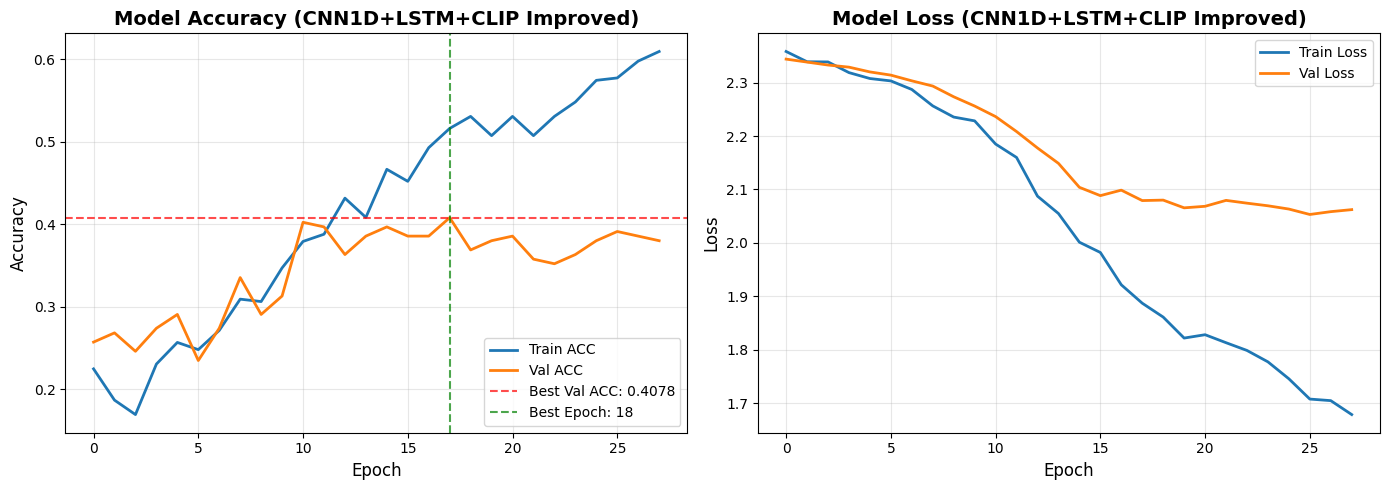


正在加载最佳模型进行测试...
6/6 [==============================] - 0s 2ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.5000    0.1600    0.2424        50
       Happy     0.5000    0.8519    0.6301        27
  Interested     0.2295    0.3784    0.2857        37
       Tired     0.6250    0.5263    0.5714        38
    Confused     0.3333    0.2963    0.3137        27

    accuracy                         0.4078       179
   macro avg     0.4376    0.4426    0.4087       179
weighted avg     0.4455    0.4078    0.3905       179


混淆矩阵:
[[ 8  7 26  1  8]
 [ 0 23  3  1  0]
 [ 1  9 14  9  4]
 [ 3  5  6 20  4]
 [ 4  2 12  1  8]]


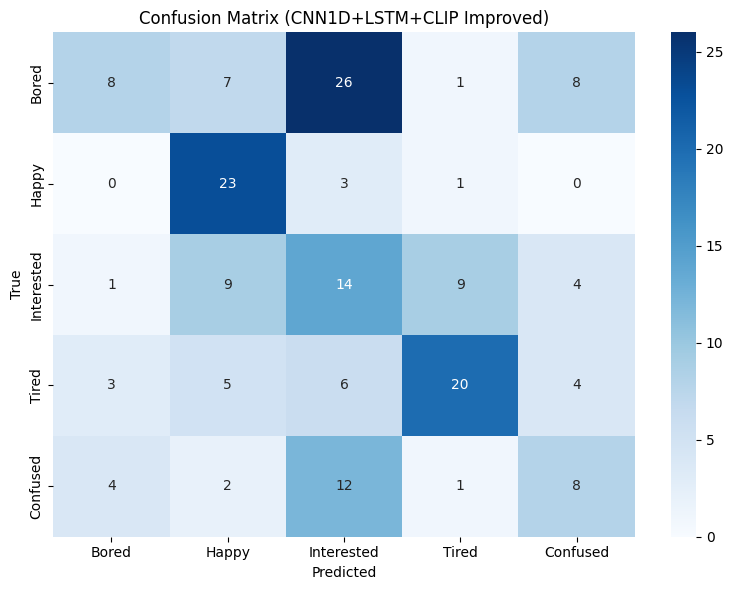


完成！


In [44]:
# ========== 构建改进模型 (CNN1D+LSTM+CLIP) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_clip['train'])
test_data = np.asarray(visual_clip['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(128, 3, 1, 'same', kernel_regularizer=l2(0.001))(x)

h = Conv1D(128, 1, 1, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv1D(64, 3, 2, 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

# LSTM层
h = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)

h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=5,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=8,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (CNN1D+LSTM+CLIP 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (CNN1D+LSTM+CLIP Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (CNN1D+LSTM+CLIP Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_LSTM_clip_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres3/1V_model_CNN1D_LSTM_clip.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables, predicted_test_lables,
                                 target_names=class_labels, digits=4, zero_division=0)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(), y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN1D+LSTM+CLIP Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres3/CNN1D_LSTM_clip_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")

# ATT

In [ ]:
class Attebtion_Self(keras.layers.Layer):
    def __init__(self,units,**kwargs):
        super(Attebtion_Self,self).__init__(**kwargs)
        self.W1=keras.layers.Dense(units)
        self.W2 = keras.layers.Dense(units)
        self.S = keras.layers.Dense(1)
        self.units=units

    def call(self,features):
        # (64)
        # attention matrix(64,64)
        # attention matrix[0] 64 features2 time step scores
        features_=tf.expand_dims(features,1)#(batch,512)-->(batch,1,512)
        score=tf.nn.tanh(self.W1(features)+self.W2(features_))
        attention_weights = tf.nn.softmax(self.S(score),axis=1)
        #ATTN=attention_weights*(features)
        ATTN = attention_weights * (self.W1(features))
        # ATTN=ATTN+features
        ATTN=tf.reduce_sum(ATTN,axis=1)

        return ATTN

# ATT+ConvLSTM2D+LSTM+mpori

In [ ]:
# ========== ATT+ConvLSTM2D+LSTM+mpori ==========
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import gc
import tensorflow.keras.backend as K
K.clear_session()
gc.collect()

train_data = np.asarray(visual_ori['train'])
test_data = np.asarray(visual_ori['test'])
print("Train shape:", train_data.shape, "Test shape:", test_data.shape)
input_shape = train_data.shape[1:]

strategy = tf.distribute.MirroredStrategy()
print(f'使用 {strategy.num_replicas_in_sync} 张 GPU')

with strategy.scope():
    x = Input(input_shape)
    h = ConvLSTM2D(16, [3,3], [2,2], 'same', return_sequences=True)(x)
    h = Attebtion_Self(16)(h)
    h = TimeDistributed(Flatten())(h)
    h = LSTM(64)(h)  # 默认tanh
    h = Dense(64, activation='relu')(h)
    res = Dense(5, 'softmax')(h)
    model = Model(inputs=x, outputs=res)
    model.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

from tensorflow.keras.callbacks import EarlyStopping
callback_list = [
    ModelCheckpoint(filepath='./data2025/res/V_model_ATT_ConvLSTM2D_LSTM_mpori.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max')
]

history = model.fit(x=train_data, y=np.asarray(label['train']), batch_size=8, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])], callbacks=callback_list, verbose=1)

acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'
print("\n" + "="*60)
print(f"[ATT+ConvLSTM2D+LSTM+mpori] 最佳 Train ACC: {max(history.history[acc_key]):.4f}")
print(f"[ATT+ConvLSTM2D+LSTM+mpori] 最佳 Val ACC: {max(history.history[val_acc_key]):.4f}")
print("="*60)

NameError: name 'visual_ori' is not defined

# ATT+ConvLSTM2D+LSTM+face

In [ ]:
# ========== ATT+ConvLSTM2D+LSTM+face ==========
K.clear_session()
gc.collect()

train_data = np.asarray(visual_face['train'])
test_data = np.asarray(visual_face['test'])
print("Train shape:", train_data.shape, "Test shape:", test_data.shape)
input_shape = train_data.shape[1:]

strategy = tf.distribute.MirroredStrategy()
print(f'使用 {strategy.num_replicas_in_sync} 张 GPU')

with strategy.scope():
    x = Input(input_shape)
    h = ConvLSTM2D(16, [3,3], [2,2], 'same', return_sequences=True)(x)
    h = Attebtion_Self(16)(h)
    h = TimeDistributed(Flatten())(h)
    h = LSTM(64)(h)  # 默认tanh
    h = Dense(64, activation='relu')(h)
    res = Dense(5, 'softmax')(h)
    model = Model(inputs=x, outputs=res)
    model.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

callback_list = [
    ModelCheckpoint(filepath='./data2025/res/V_model_ATT_ConvLSTM2D_LSTM_face.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max')
]

history = model.fit(x=train_data, y=np.asarray(label['train']), batch_size=8, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])], callbacks=callback_list, verbose=1)

acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'
print("\n" + "="*60)
print(f"[ATT+ConvLSTM2D+LSTM+face] 最佳 Train ACC: {max(history.history[acc_key]):.4f}")
print(f"[ATT+ConvLSTM2D+LSTM+face] 最佳 Val ACC: {max(history.history[val_acc_key]):.4f}")
print("="*60)

# ATT+CNN1D+LSTM+clip

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# ========== ATT+CNN1D+LSTM+clip ==========
K.clear_session()
gc.collect()

train_data = np.asarray(visual_clip['train'])
test_data = np.asarray(visual_clip['test'])
print("Train shape:", train_data.shape, "Test shape:", test_data.shape)
input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(64, 3, 1, 'same')(x)
h = Conv1D(64, 1, 1, 'same')(h)
h = Conv1D(64, 3, 3, 'same')(h)
h = LSTM(64)(h)  # 默认tanh
h = Dense(64, activation='relu')(h)
h = Attebtion_Self(16)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)
model.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

callback_list = [
    ModelCheckpoint(filepath='./data2025/res/V_model_ATT_CNN1D_LSTM_clip.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max')
]

history = model.fit(x=train_data, y=np.asarray(label['train']), batch_size=16, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])], callbacks=callback_list, verbose=1)

acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'
print("\n" + "="*60)
print(f"[ATT+CNN1D+LSTM+clip] 最佳 Train ACC: {max(history.history[acc_key]):.4f}")
print(f"[ATT+CNN1D+LSTM+clip] 最佳 Val ACC: {max(history.history[val_acc_key]):.4f}")
print("="*60)

Train shape: (355, 16, 512) Test shape: (167, 16, 512)


2025-12-17 23:03:52.118255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-17 23:03:52.121321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-17 23:03:52.142621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-17 23:03:52.145342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-17 23:03:52.148215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

NameError: name 'EarlyStopping' is not defined

# ATT+CNN1D+LSTM+openfece

In [ ]:
# ========== ATT+CNN1D+LSTM+openface ==========
K.clear_session()
gc.collect()

train_data = np.asarray(visual_of['train'])
test_data = np.asarray(visual_of['test'])
print("Train shape:", train_data.shape, "Test shape:", test_data.shape)
input_shape = train_data.shape[1:]

x = Input(input_shape)
h = Conv1D(64, 3, 1, 'same')(x)
h = Conv1D(64, 1, 1, 'same')(h)
h = Conv1D(64, 3, 3, 'same')(h)
h = LSTM(64)(h)  # 默认tanh
h = Dense(64, activation='relu')(h)
h = Attebtion_Self(16)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)
model.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

callback_list = [
    ModelCheckpoint(filepath='./data2025/res/V_model_ATT_CNN1D_LSTM_openface.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, mode='max')
]

history = model.fit(x=train_data, y=np.asarray(label['train']), batch_size=16, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])], callbacks=callback_list, verbose=1)

acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'
print("\n" + "="*60)
print(f"[ATT+CNN1D+LSTM+openface] 最佳 Train ACC: {max(history.history[acc_key]):.4f}")
print(f"[ATT+CNN1D+LSTM+openface] 最佳 Val ACC: {max(history.history[val_acc_key]):.4f}")
print("="*60)

# Conv3D+LSTM+mpori

Train shape: (355, 16, 224, 224, 3)
Test shape: (167, 16, 224, 224, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 16, 112, 112, 32)  2624      
                                                                 
 batch_normalization (BatchN  (None, 16, 112, 112, 32)  128      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16, 112, 112, 32)  0         
                                                                 
 dropout (Dropout)           (None, 16, 112, 112, 32)  0         
                                                        

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


89/89 [==============================] - 15s 168ms/step - loss: 3.1085 - acc: 0.1465 - val_loss: 2.8254 - val_acc: 0.1617 - lr: 1.0000e-04
Epoch 2/50
89/89 [==============================] - ETA: 0s - loss: 2.8587 - acc: 0.1859

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


89/89 [==============================] - 13s 152ms/step - loss: 2.8587 - acc: 0.1859 - val_loss: 2.6406 - val_acc: 0.1796 - lr: 1.0000e-04
Epoch 3/50
89/89 [==============================] - ETA: 0s - loss: 2.6235 - acc: 0.1803

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


89/89 [==============================] - 14s 155ms/step - loss: 2.6235 - acc: 0.1803 - val_loss: 2.5160 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 4/50
89/89 [==============================] - ETA: 0s - loss: 2.5137 - acc: 0.1746

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf/assets


89/89 [==============================] - 14s 155ms/step - loss: 2.5137 - acc: 0.1746 - val_loss: 2.4012 - val_acc: 0.2216 - lr: 1.0000e-04
Epoch 5/50
89/89 [==============================] - 7s 83ms/step - loss: 2.4123 - acc: 0.2028 - val_loss: 2.3166 - val_acc: 0.2156 - lr: 1.0000e-04
Epoch 6/50
89/89 [==============================] - 7s 83ms/step - loss: 2.3524 - acc: 0.1746 - val_loss: 2.2539 - val_acc: 0.2156 - lr: 1.0000e-04
Epoch 7/50
89/89 [==============================] - 7s 83ms/step - loss: 2.2698 - acc: 0.1859 - val_loss: 2.1933 - val_acc: 0.2156 - lr: 1.0000e-04
Epoch 8/50
89/89 [==============================] - 7s 83ms/step - loss: 2.2095 - acc: 0.1887 - val_loss: 2.1459 - val_acc: 0.1796 - lr: 1.0000e-04
Epoch 9/50
89/89 [==============================] - 7s 83ms/step - loss: 2.1730 - acc: 0.1859 - val_loss: 2.1082 - val_acc: 0.1796 - lr: 1.0000e-04
Epoch 10/50
89/89 [==============================] - 7s 84ms/step - loss: 2.1164 - acc: 0.2197 - val_loss: 2.0739 - val_a

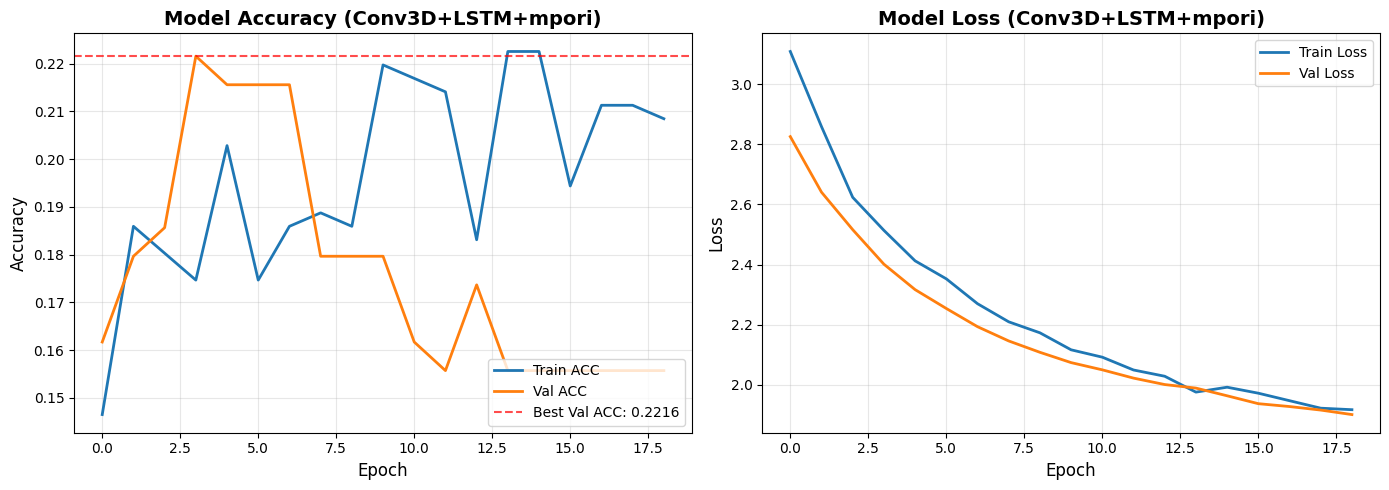


正在加载最佳模型进行测试...
6/6 [==============================] - 1s 58ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.0000    0.0000    0.0000        44
       Happy     0.0000    0.0000    0.0000        31
  Interested     0.0000    0.0000    0.0000        26
       Tired     0.2195    1.0000    0.3600        36
    Confused     0.3333    0.0333    0.0606        30

    accuracy                         0.2216       167
   macro avg     0.1106    0.2067    0.0841       167
weighted avg     0.1072    0.2216    0.0885       167



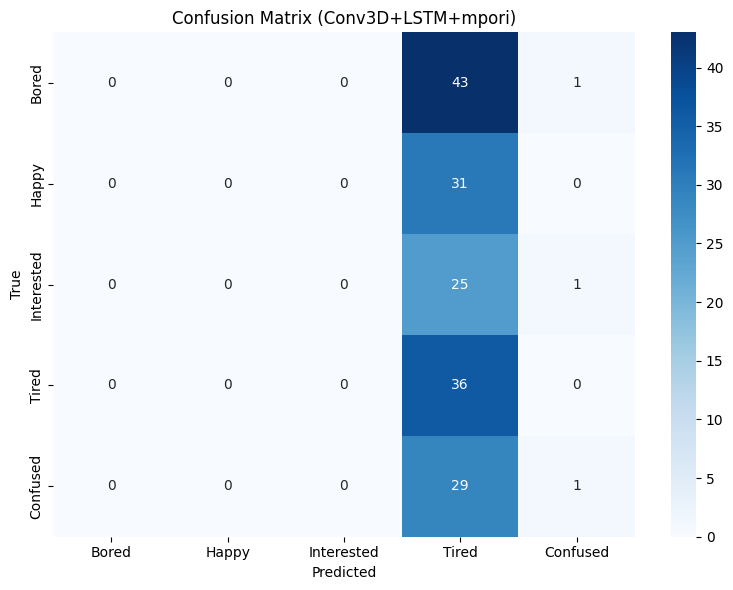


完成！


In [ ]:
# ========== 构建模型 (Conv3D+LSTM+mpori) ==========
# 传统串联架构：Conv3D提取空间特征 → LSTM建模时序 → Dense分类
# 与 CNN1D+LSTM+openface/clip 架构统一

import gc
tf.keras.backend.clear_session()
gc.collect()

train_data = np.asarray(visual_ori['train'])
test_data = np.asarray(visual_ori['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]  # (16, 224, 224, 3)

x = Input(input_shape)

# ===== Conv3D 空间特征提取 (stride在时间维度=1，保留时间步) =====
h = Conv3D(32, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)
h = Dropout(0.2)(h)

h = Conv3D(64, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(128, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

# ===== 展平空间维度，保留时间维度给LSTM =====
h = TimeDistributed(Flatten())(h)

# ===== LSTM 时序建模 =====
h = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)

# ===== Dense 分类层 =====
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

# 编译模型
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)

model.summary()

# 回调函数
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True, mode='max')
]

# 训练模型
history = model.fit(x=train_data, y=np.asarray(label['train']),
                    batch_size=4, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list, class_weight=class_weight_dict, verbose=1)

# 输出结果
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (Conv3D+LSTM+mpori)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (Conv3D+LSTM+mpori)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (Conv3D+LSTM+mpori)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres/Conv3D_LSTM_mpori_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres/1V_model_Conv3D_LSTM_mpori.tf')
pred = model.predict(test_data)
predicted_test_labels = pred.argmax(axis=1)
numeric_test_labels = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_labels,
                                 predicted_test_labels,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0)
print(eval_res)

# 混淆矩阵
cm = confusion_matrix(numeric_test_labels, predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Conv3D+LSTM+mpori)')
plt.tight_layout()
plt.savefig('./data2025/vres/Conv3D_LSTM_mpori_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")


# Conv3D+LSTM+face

Train shape: (355, 16, 224, 224, 3)
Test shape: (167, 16, 224, 224, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 16, 112, 112, 32)  2624      
                                                                 
 batch_normalization (BatchN  (None, 16, 112, 112, 32)  128      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16, 112, 112, 32)  0         
                                                                 
 dropout (Dropout)           (None, 16, 112, 112, 32)  0         
                                                        

INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


89/89 [==============================] - 15s 164ms/step - loss: 3.0663 - acc: 0.1944 - val_loss: 2.8008 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 2/50
89/89 [==============================] - 7s 84ms/step - loss: 2.8204 - acc: 0.1775 - val_loss: 2.6233 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 3/50
89/89 [==============================] - 7s 83ms/step - loss: 2.5779 - acc: 0.2254 - val_loss: 2.4862 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 4/50
89/89 [==============================] - 7s 83ms/step - loss: 2.5177 - acc: 0.2225 - val_loss: 2.3820 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 5/50
89/89 [==============================] - ETA: 0s - loss: 2.3958 - acc: 0.1662

INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


89/89 [==============================] - 14s 155ms/step - loss: 2.3958 - acc: 0.1662 - val_loss: 2.2998 - val_acc: 0.1916 - lr: 1.0000e-04
Epoch 6/50
89/89 [==============================] - 8s 85ms/step - loss: 2.2859 - acc: 0.2113 - val_loss: 2.2231 - val_acc: 0.1796 - lr: 1.0000e-04
Epoch 7/50
89/89 [==============================] - 7s 83ms/step - loss: 2.2253 - acc: 0.2169 - val_loss: 2.1650 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 8/50
89/89 [==============================] - 7s 83ms/step - loss: 2.1322 - acc: 0.2338 - val_loss: 2.1224 - val_acc: 0.1796 - lr: 1.0000e-04
Epoch 9/50
89/89 [==============================] - 8s 85ms/step - loss: 2.1268 - acc: 0.2366 - val_loss: 2.0757 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 10/50
89/89 [==============================] - ETA: 0s - loss: 2.1160 - acc: 0.1859

INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


89/89 [==============================] - 13s 151ms/step - loss: 2.1160 - acc: 0.1859 - val_loss: 2.0340 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 11/50
89/89 [==============================] - 7s 84ms/step - loss: 2.0595 - acc: 0.2366 - val_loss: 2.0039 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 12/50
89/89 [==============================] - 8s 85ms/step - loss: 2.0044 - acc: 0.2592 - val_loss: 1.9790 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 13/50
89/89 [==============================] - 7s 84ms/step - loss: 2.0257 - acc: 0.1887 - val_loss: 1.9560 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 14/50
89/89 [==============================] - 8s 85ms/step - loss: 1.9746 - acc: 0.2169 - val_loss: 1.9396 - val_acc: 0.2515 - lr: 1.0000e-04
Epoch 15/50
89/89 [==============================] - ETA: 0s - loss: 1.9626 - acc: 0.2085

INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


89/89 [==============================] - 13s 151ms/step - loss: 1.9626 - acc: 0.2085 - val_loss: 1.9258 - val_acc: 0.2695 - lr: 1.0000e-04
Epoch 16/50
89/89 [==============================] - 7s 84ms/step - loss: 1.9365 - acc: 0.2141 - val_loss: 1.9044 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 17/50
89/89 [==============================] - 7s 84ms/step - loss: 1.9315 - acc: 0.2394 - val_loss: 1.8877 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 18/50
89/89 [==============================] - 8s 86ms/step - loss: 1.8955 - acc: 0.2169 - val_loss: 1.8730 - val_acc: 0.2216 - lr: 1.0000e-04
Epoch 19/50
89/89 [==============================] - 7s 84ms/step - loss: 1.8905 - acc: 0.2000 - val_loss: 1.8591 - val_acc: 0.2275 - lr: 1.0000e-04
Epoch 20/50
89/89 [==============================] - 8s 85ms/step - loss: 1.8761 - acc: 0.2000 - val_loss: 1.8501 - val_acc: 0.2515 - lr: 1.0000e-04
Epoch 21/50
89/89 [==============================] - 7s 84ms/step - loss: 1.8822 - acc: 0.2000 - val_loss: 1.8425 - 

INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/V_model_Conv3D_LSTM_face.tf/assets


89/89 [==============================] - 14s 161ms/step - loss: 1.8715 - acc: 0.1775 - val_loss: 1.8360 - val_acc: 0.2754 - lr: 1.0000e-04
Epoch 23/50
89/89 [==============================] - 7s 84ms/step - loss: 1.8667 - acc: 0.1944 - val_loss: 1.8337 - val_acc: 0.2395 - lr: 1.0000e-04
Epoch 24/50
89/89 [==============================] - 7s 84ms/step - loss: 1.8715 - acc: 0.2338 - val_loss: 1.8333 - val_acc: 0.2275 - lr: 1.0000e-04
Epoch 25/50
89/89 [==============================] - 8s 85ms/step - loss: 1.8335 - acc: 0.2197 - val_loss: 1.8281 - val_acc: 0.2156 - lr: 1.0000e-04
Epoch 26/50
89/89 [==============================] - 7s 83ms/step - loss: 1.8364 - acc: 0.2000 - val_loss: 1.8164 - val_acc: 0.1916 - lr: 1.0000e-04
Epoch 27/50
89/89 [==============================] - 7s 84ms/step - loss: 1.8146 - acc: 0.2141 - val_loss: 1.8139 - val_acc: 0.1677 - lr: 1.0000e-04
Epoch 28/50
89/89 [==============================] - 8s 85ms/step - loss: 1.8180 - acc: 0.1972 - val_loss: 1.8057 - 

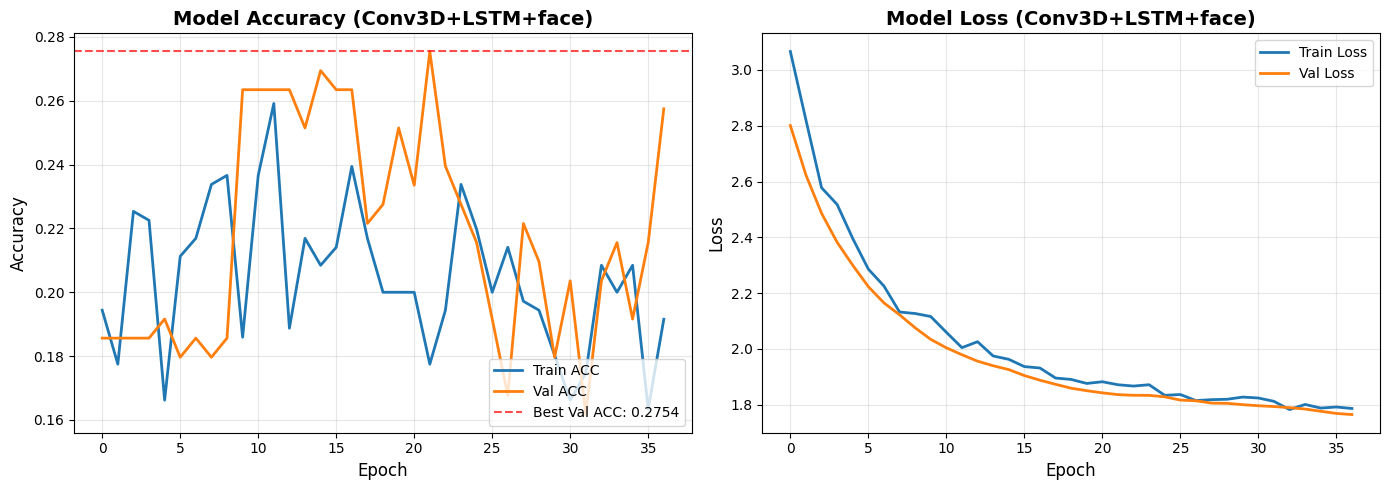


正在加载最佳模型进行测试...
6/6 [==============================] - 1s 60ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.2704    0.9773    0.4236        44
       Happy     0.0000    0.0000    0.0000        31
  Interested     0.0000    0.0000    0.0000        26
       Tired     0.4286    0.0833    0.1395        36
    Confused     0.0000    0.0000    0.0000        30

    accuracy                         0.2754       167
   macro avg     0.1398    0.2121    0.1126       167
weighted avg     0.1636    0.2754    0.1417       167



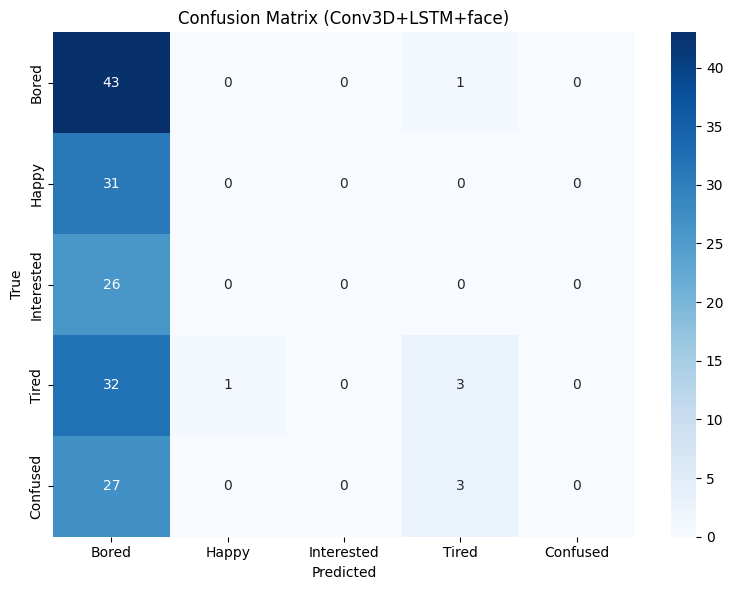


完成！


In [6]:
# ========== 构建模型 (Conv3D+LSTM+face) ==========
# 传统串联架构：Conv3D提取空间特征 → LSTM建模时序 → Dense分类
# 与 CNN1D+LSTM+openface/clip 架构统一

import gc
tf.keras.backend.clear_session()
gc.collect()

train_data = np.asarray(visual_face['train'])
test_data = np.asarray(visual_face['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]  # (16, 224, 224, 3)

x = Input(input_shape)

# ===== Conv3D 空间特征提取 (stride在时间维度=1，保留时间步) =====
h = Conv3D(32, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)
h = Dropout(0.2)(h)

h = Conv3D(64, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

h = Conv3D(128, [3,3,3], [1,2,2], 'same', kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)
h = tf.keras.layers.ReLU()(h)

# ===== 展平空间维度，保留时间维度给LSTM =====
h = TimeDistributed(Flatten())(h)

# ===== LSTM 时序建模 =====
h = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = tf.keras.layers.GlobalMaxPooling1D()(h)

# ===== Dense 分类层 =====
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

# 编译模型
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)

model.summary()

# 回调函数
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres/V_model_Conv3D_LSTM_face.tf',
                    monitor='val_acc', save_best_only=True, save_freq='epoch'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True, mode='max')
]

# 训练模型
history = model.fit(x=train_data, y=np.asarray(label['train']),
                    batch_size=4, epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list, class_weight=class_weight_dict, verbose=1)

# 输出结果
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (Conv3D+LSTM+face)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (Conv3D+LSTM+face)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (Conv3D+LSTM+face)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres/Conv3D_LSTM_face_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres/V_model_Conv3D_LSTM_face.tf')
pred = model.predict(test_data)
predicted_test_labels = pred.argmax(axis=1)
numeric_test_labels = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_labels,
                                 predicted_test_labels,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0)
print(eval_res)

# 混淆矩阵
cm = confusion_matrix(numeric_test_labels, predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Conv3D+LSTM+face)')
plt.tight_layout()
plt.savefig('./data2025/vres/Conv3D_LSTM_face_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")


Train shape: (355, 16, 224, 224, 3)
Test shape: (167, 16, 224, 224, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 224, 224, 3)  0         
                             ]                                   
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 16, 112, 112, 32)  40448     
                                                                 
 batch_normalization_2 (Batc  (None, 16, 112, 112, 32)  128      
 hNormalization)                                                 
                                                                 
 conv_lstm2d_3 (ConvLSTM2D)  (None, 16, 56, 56, 64)    221440    
                                                                 
 batch_normalization_3 (Batc  (None, 16, 56, 56, 64)   256       
 hNormalization)                                      

2025-12-26 17:16:02.891702: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8301
2025-12-26 17:16:04.011330: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-12-26 17:16:04.012808: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-12-26 17:16:04.012883: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-12-26 17:16:04.014621: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-12-26 17:16:04.014723: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-12-26 17:16:04.847184: I tensorflow/stream_executor/cuda/c

89/89 [==============================] - ETA: 0s - loss: 3.1323 - acc: 0.1944

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


89/89 [==============================] - 31s 309ms/step - loss: 3.1323 - acc: 0.1944 - val_loss: 2.9585 - val_acc: 0.1856 - lr: 1.0000e-04
Epoch 2/50
89/89 [==============================] - 21s 231ms/step - loss: 3.0346 - acc: 0.2000 - val_loss: 2.9599 - val_acc: 0.1677 - lr: 1.0000e-04
Epoch 3/50
89/89 [==============================] - 20s 230ms/step - loss: 2.9442 - acc: 0.2310 - val_loss: 2.9143 - val_acc: 0.1677 - lr: 1.0000e-04
Epoch 4/50
89/89 [==============================] - 20s 229ms/step - loss: 3.0233 - acc: 0.1549 - val_loss: 2.9514 - val_acc: 0.1677 - lr: 1.0000e-04
Epoch 5/50
89/89 [==============================] - ETA: 0s - loss: 3.0210 - acc: 0.2085

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


89/89 [==============================] - 41s 469ms/step - loss: 3.0210 - acc: 0.2085 - val_loss: 2.9370 - val_acc: 0.2515 - lr: 1.0000e-04
Epoch 6/50
89/89 [==============================] - ETA: 0s - loss: 2.9740 - acc: 0.2028

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


89/89 [==============================] - 38s 435ms/step - loss: 2.9740 - acc: 0.2028 - val_loss: 2.9409 - val_acc: 0.2635 - lr: 1.0000e-04
Epoch 7/50
89/89 [==============================] - 20s 230ms/step - loss: 3.0195 - acc: 0.1915 - val_loss: 2.9331 - val_acc: 0.2036 - lr: 1.0000e-04
Epoch 8/50
89/89 [==============================] - 21s 241ms/step - loss: 2.9911 - acc: 0.2141 - val_loss: 2.9087 - val_acc: 0.2335 - lr: 1.0000e-04
Epoch 9/50
89/89 [==============================] - ETA: 0s - loss: 2.9472 - acc: 0.2197

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


89/89 [==============================] - 45s 506ms/step - loss: 2.9472 - acc: 0.2197 - val_loss: 2.9036 - val_acc: 0.2754 - lr: 1.0000e-04
Epoch 10/50
89/89 [==============================] - 21s 232ms/step - loss: 2.9313 - acc: 0.2423 - val_loss: 2.9030 - val_acc: 0.1737 - lr: 1.0000e-04
Epoch 11/50
89/89 [==============================] - 21s 231ms/step - loss: 2.9610 - acc: 0.2085 - val_loss: 2.9149 - val_acc: 0.1916 - lr: 1.0000e-04
Epoch 12/50
89/89 [==============================] - 21s 231ms/step - loss: 2.9605 - acc: 0.2056 - val_loss: 2.9271 - val_acc: 0.1737 - lr: 1.0000e-04
Epoch 13/50
89/89 [==============================] - 20s 228ms/step - loss: 2.9819 - acc: 0.2028 - val_loss: 2.9349 - val_acc: 0.1916 - lr: 1.0000e-04
Epoch 14/50
89/89 [==============================] - 21s 233ms/step - loss: 3.0036 - acc: 0.1972 - val_loss: 2.9204 - val_acc: 0.2455 - lr: 1.0000e-04
Epoch 15/50
89/89 [==============================] - 20s 229ms/step - loss: 2.9761 - acc: 0.2000 - val_los

INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


INFO:tensorflow:Assets written to: ./data2025/vres/1V_model_ConvLSTM2D_Media.tf/assets


89/89 [==============================] - 41s 463ms/step - loss: 2.9855 - acc: 0.1577 - val_loss: 2.8949 - val_acc: 0.2934 - lr: 1.0000e-04
Epoch 17/50
89/89 [==============================] - 21s 234ms/step - loss: 2.9380 - acc: 0.2141 - val_loss: 2.8665 - val_acc: 0.2754 - lr: 1.0000e-04
Epoch 18/50
89/89 [==============================] - 20s 226ms/step - loss: 2.8919 - acc: 0.2366 - val_loss: 2.8889 - val_acc: 0.2515 - lr: 1.0000e-04
Epoch 19/50
89/89 [==============================] - 21s 241ms/step - loss: 2.9467 - acc: 0.1972 - val_loss: 2.8670 - val_acc: 0.1557 - lr: 1.0000e-04
Epoch 20/50
89/89 [==============================] - 21s 232ms/step - loss: 2.8935 - acc: 0.1944 - val_loss: 2.8218 - val_acc: 0.2695 - lr: 1.0000e-04
Epoch 21/50
89/89 [==============================] - 21s 232ms/step - loss: 2.8583 - acc: 0.2085 - val_loss: 2.8073 - val_acc: 0.1437 - lr: 1.0000e-04
Epoch 22/50
89/89 [==============================] - 21s 233ms/step - loss: 2.8308 - acc: 0.1944 - val_los

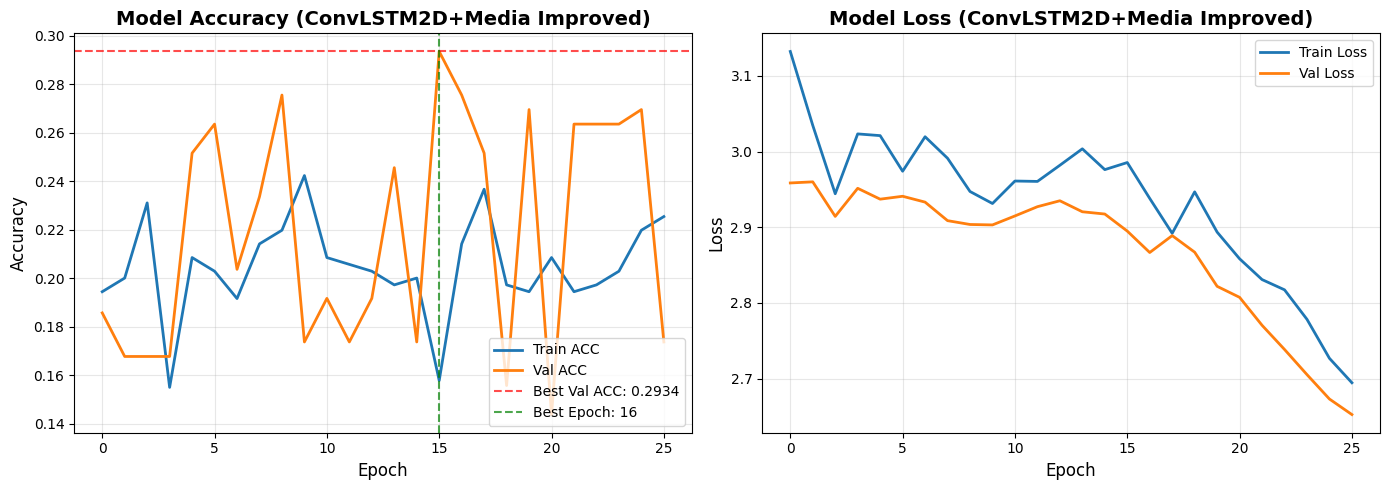


正在加载最佳模型进行测试...
6/6 [==============================] - 9s 413ms/step

分类报告:
              precision    recall  f1-score   support

       Bored     0.2857    0.9545    0.4398        44
       Happy     0.3333    0.0645    0.1081        31
  Interested     0.0000    0.0000    0.0000        26
       Tired     0.4000    0.0556    0.0976        36
    Confused     0.3750    0.1000    0.1579        30

    accuracy                         0.2934       167
   macro avg     0.2788    0.2349    0.1607       167
weighted avg     0.2907    0.2934    0.1853       167


混淆矩阵:
[[42  0  1  0  1]
 [27  2  0  1  1]
 [22  1  0  1  2]
 [31  2  0  2  1]
 [25  1  0  1  3]]


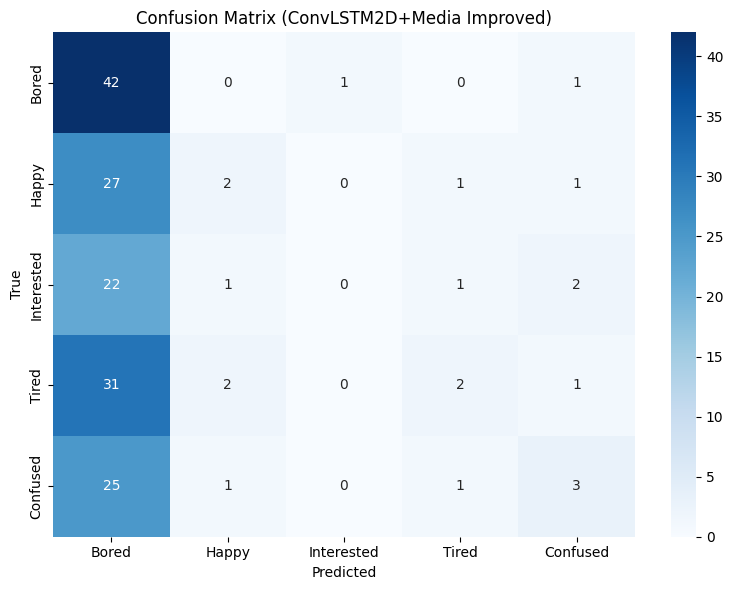


完成！


In [ ]:
# ========== 构建改进模型 (ConvLSTM2D+face) ==========
# 改进: 添加BatchNormalization、Dropout、L2正则化、类别权重

train_data = np.asarray(visual_ori['train'])
test_data = np.asarray(visual_ori['test'])

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

input_shape = train_data.shape[1:]

x = Input(input_shape)
h = ConvLSTM2D(32, [3,3], [2,2], 'same', return_sequences=True,
               kernel_regularizer=l2(0.001))(x)
h = BatchNormalization()(h)

h = ConvLSTM2D(64, [3,3], [2,2], 'same', return_sequences=True,
               kernel_regularizer=l2(0.001))(h)
h = BatchNormalization()(h)

h = TimeDistributed(Flatten())(h)
h = LSTM(128, return_sequences=False, kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
h = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.5)(h)
h = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(h)
h = Dropout(0.3)(h)
res = Dense(5, 'softmax')(h)

model = Model(inputs=x, outputs=res)

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='acc',
              run_eagerly=True)
model.summary()

# ========== 训练代码 ==========
callback_list = [
    ModelCheckpoint(filepath='./data2025/vres/V_model_ConvLSTM2D_Media.tf',
                    monitor='val_acc',
                    save_best_only=True,
                    save_freq='epoch'),
    EarlyStopping(monitor='val_acc',
                  patience=10,
                  restore_best_weights=True,
                  mode='max'),
    ReduceLROnPlateau(monitor='val_acc',
                      factor=0.5,
                      patience=10,
                      min_lr=1e-7,
                      mode='max',
                      verbose=1)
]

history = model.fit(x=train_data,
                    y=np.asarray(label['train']),
                    batch_size=4,
                    epochs=50,
                    validation_data=[test_data, np.asarray(label['test'])],
                    callbacks=callback_list,
                    class_weight=class_weight_dict)

# ========== 输出最佳准确度 ==========
acc_key = 'acc' if 'acc' in history.history else 'accuracy'
val_acc_key = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'

best_train_acc = max(history.history[acc_key])
best_val_acc = max(history.history[val_acc_key])
best_epoch = history.history[val_acc_key].index(best_val_acc) + 1

print("\n" + "="*60)
print("训练结果总结 (ConvLSTM2D+face 改进版)")
print("="*60)
print(f"最佳训练准确度 (Train ACC): {best_train_acc:.4f}")
print(f"最佳验证准确度 (Val ACC): {best_val_acc:.4f}")
print(f"最佳准确度出现在第 {best_epoch} 个epoch")
print(f"实际训练了 {len(history.history[acc_key])} 个epochs")
print("="*60 + "\n")

# ========== 绘制训练曲线 ==========
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history[acc_key], label='Train ACC', linewidth=2)
plt.plot(history.history[val_acc_key], label='Val ACC', linewidth=2)
plt.axhline(y=best_val_acc, color='r', linestyle='--', alpha=0.7, label=f'Best Val ACC: {best_val_acc:.4f}')
plt.axvline(x=best_epoch-1, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch: {best_epoch}')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (ConvLSTM2D+Media Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (ConvLSTM2D+Media Improved)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./data2025/vres/ConvLSTM2D_Media_improved_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 测试 ==========
print("\n正在加载最佳模型进行测试...")
model = keras.models.load_model('./data2025/vres/V_model_ConvLSTM2D_Media.tf')
pred = model.predict(test_data)
predicted_test_lables = pred.argmax(axis=1)
numeric_test_lables = np.array(label['test'])

class_labels = ['Bored', 'Happy', 'Interested', 'Tired', 'Confused']

print("\n分类报告:")
print("="*60)
eval_res = classification_report(numeric_test_lables,
                                 predicted_test_lables,
                                 target_names=class_labels,
                                 digits=4,
                                 zero_division=0,
                                 output_dict=False)
print(eval_res)

print("\n混淆矩阵:")
print("="*60)
cm = confusion_matrix(y_true=numeric_test_lables.tolist(),
                      y_pred=predicted_test_lables.tolist())
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ConvLSTM2D+Media Improved)')
plt.tight_layout()
plt.savefig('./data2025/vres/ConvLSTM2D_Media_improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n完成！")
